GITLAB: https://github.com/ana-delfino/infnet_clusterizacao_avaliacao

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from plot_aux import plot_boxplots_by_columns, plot_by_columns, plot_by_column, plot_boxplots_by_columns_hue, plot_silhouette
sns.set(style='darkgrid')
sns.set(font_scale=0.8)

# Infraestrutura

### 1.1 
Você está rodando em Python 3.9+

In [2]:
!python --version

Python 3.11.10


### 1.2 
Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [3]:
print(sys.prefix)

/Users/anapaula/projects/infnet_clusterizacao_avaliacao/.env


### 1.3 
Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [4]:
!pip list


Package                   Version
------------------------- -----------
alembic                   1.14.0
appnope                   0.1.4
asttokens                 3.0.0
attrs                     24.2.0
colorlog                  6.9.0
comm                      0.2.2
contourpy                 1.3.1
cycler                    0.12.1
debugpy                   1.8.10
decorator                 5.1.1
et_xmlfile                2.0.0
executing                 2.1.0
fastjsonschema            2.21.1
fonttools                 4.55.3
ipykernel                 6.29.5
ipython                   8.30.0
jedi                      0.19.2
joblib                    1.4.2
jsonschema                4.23.0
jsonschema-specifications 2024.10.1
jupyter_client            8.6.3
jupyter_core              5.7.2
kiwisolver                1.4.7
Mako                      1.3.8
MarkupSafe                3.0.2
matplotlib                3.9.3
matplotlib-inline         0.1.7
nbformat                  5.10.4
nest-asyncio     

### 1.4 
Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [5]:
with open('requirements.txt', 'r') as file:
    content = file.read()

print(content)

asttokens==3.0.0
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.10
decorator==5.1.1
et_xmlfile==2.0.0
executing==2.1.0
fonttools==4.55.3
ipykernel==6.29.5
ipython==8.30.0
jedi==0.19.2
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
kiwisolver==1.4.7
matplotlib==3.9.3
matplotlib-inline==0.1.7
nest-asyncio==1.6.0
numpy==2.2.0
openpyxl==3.1.5
packaging==24.2
pandas==2.2.3
parso==0.8.4
pexpect==4.9.0
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
psutil==6.1.0
ptyprocess==0.7.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pytz==2024.2
pyzmq==26.2.0
scikit-learn==1.6.0
scipy==1.14.1
seaborn==0.13.2
six==1.17.0
stack-data==0.6.3
threadpoolctl==3.5.0
tornado==6.4.2
traitlets==5.14.3
typing_extensions==4.12.2
tzdata==2024.2
wcwidth==0.2.13
xlrd==2.0.1
yellowbrick==1.5



### 1.5  
Tire um printscreen do ambiente que será usado rodando em sua máquina.

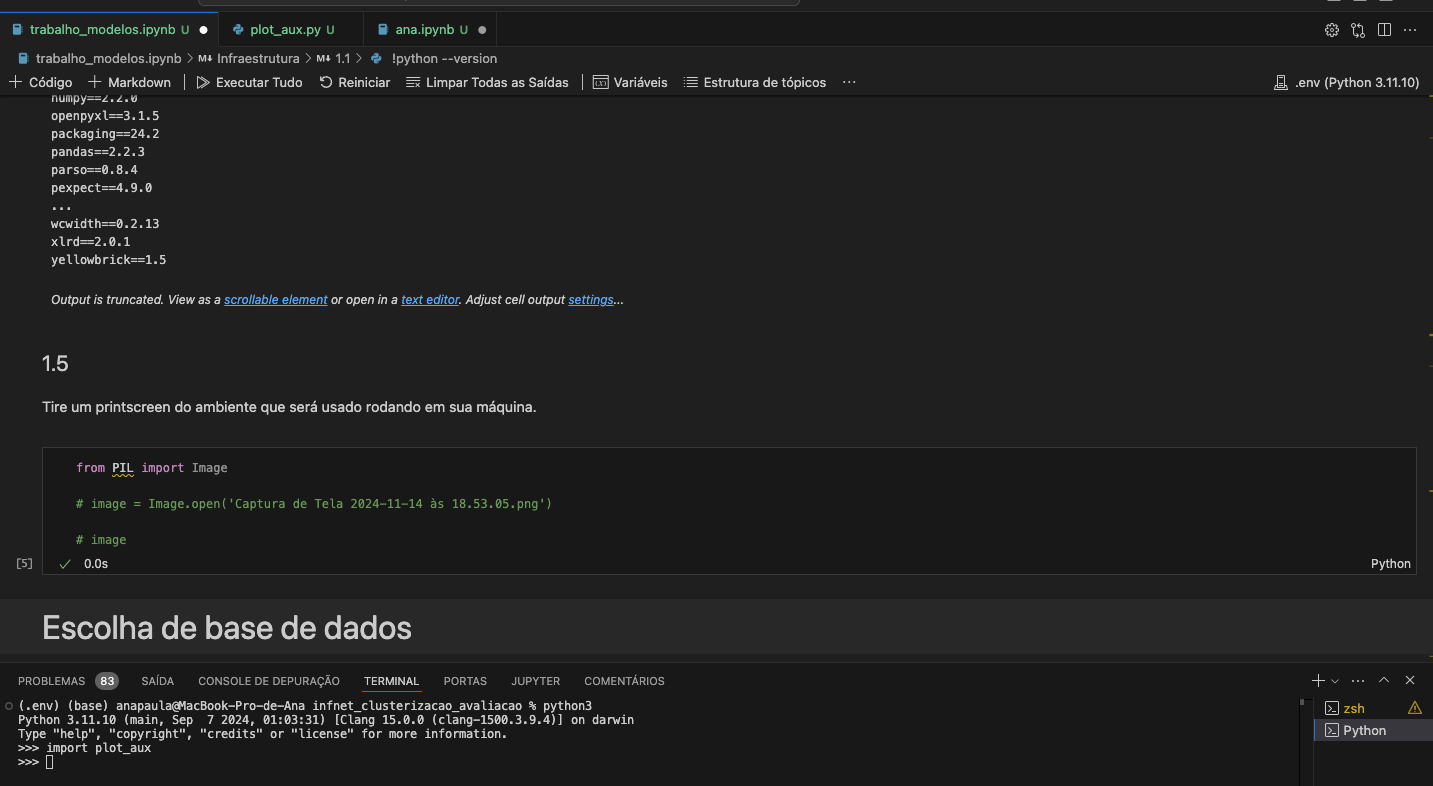

In [6]:
from PIL import Image

image = Image.open('Captura de Tela 2024-12-19 às 15.43.32.png')

image

# Escolha de base de dados


### 2.1 
Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
### 2.2 
Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.


`RESPOSTA`: A base de dados escolhida contém dados dos munícipios brasileiros - Todos os dados foram coletados no site IPEADATA e snao referentes a pesquisa de dados socioeconômicos nos munícipios para o Atlas de desenvolvimento Humano brasileiro. A idea é agrupar os municipios de acordo com seus dados socioeconômicos afim de entender as similaridades

- **Nome_UF** : Estado ao qual o município pertence 
                       
- Codigo  : Código do IBGE para o município  

- Nome_Município  : Nome do município   
                
- capital : flag que indica se o munícipio é a capital do estado   

- latitude : Latitude do município        

- longitude : Longitude do município  

- pop_25_ens_fundamental2010: População de 25 anos ou mais com fundamental completo - Razão entre a população de 25 anos ou mais de idade que concluiu o ensino fundamental, em qualquer de suas modalidades (regular seriado, não seriado, EJA ou supletivo), e o total de pessoas nesta faixa etária, multiplicada por 100. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. A dimensão educação, acesso ao conhecimento no IDHM é uma composição de indicadores de escolaridade da população adulta e de fluxo escolar da população jovem. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.    

- indicetheil2010 :  Índice de Theil-L mede a desigualdade na distribuição de indivíduos segundo a renda domiciliar per capita, excluídos aqueles com renda domiciliar per capita nula. É o logaritmo da razão entre as médias aritmética e geométrica da renda domiciliar per capita dos indivíduos, sendo nulo quando não existir desigualdade de renda entre eles e tendente ao infinito quando a desigualdade tender ao máximo. Este indicador faz parte do bloco de indicadores que contém nível de renda; de pobreza e de desigualdade de renda. São indicadores utilizados na análise do IDHM (Índice de Desenvolvimento Humano Municipal). Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.    

- pop_dom_paredesnaoalvenaria2010 :  Pessoas em domicílios com paredes que não sejam de alvenaria ou madeira aparelhada - "Razão entre as pessoas que vivem em domicílios cujas paredes não são de alvenaria nem de madeira aparelhada e a população total residente em domicílios particulares permanentes, multiplicada por 100. São considerados apenas os domicílios particulares permanentes. Este indicador faz parte do bloco de indicadores relacionados às condições habitacionais, envolvendo características da habitação (tipo de parede e número de pessoas por dormitório) e acesso a serviços (água, esgoto, lixo e luz). Ele colabora com a análise de uma das dimensões do IDHM reduzindo as limitações do IDH original frente à realidade dos municípios brasileiros. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE. 

- pop_25_ens_medio2010 : População de 25 anos ou mais com ensino médio completo - Razão entre a população de 25 anos ou mais de idade que concluiu o ensino médio, em qualquer de suas modalidades (regular seriado, não seriado, EJA ou supletivo) e o total de pessoas nesta faixa etária, multiplicada por 100. Foram consideradas como tendo concluído o ensino médio as pessoas frequentando a 4ª série desse nível. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. A dimensão educação, acesso ao conhecimento no IDHM é uma composição de indicadores de escolaridade da população adulta e de fluxo escolar da população jovem. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE. 

- expect_anos_estudo2010 :  Expectativa de anos de estudo aos 18 anos de idade. Número médio de anos de estudo que uma geração de crianças que ingressa na escola deverá completar ao atingir 18 anos de idade, se os padrões atuais se mantiverem ao longo de sua vida escolar. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. A dimensão educação, acesso ao conhecimento no IDHM é uma composição de indicadores de escolaridade da população adulta e de fluxo escolar da população jovem. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE. 

- pop_dom_aguaencanada2010 : População que vive em domicílios com água encanada - Razão entre a população que vive em domicílios particulares permanentes com água canalizada para um ou mais cômodos e a população total residente em domicílios particulares permanentes, multiplicada por 100. A água pode ser proveniente de rede geral, de poço, de nascente ou de reservatório abastecido por água das chuvas ou carro-pipa. Este indicador faz parte do bloco de indicadores relacionados às condições habitacionais, envolvendo características da habitação (tipo de parede e número de pessoas por dormitório) e acesso a serviços (água, esgoto, lixo e luz). Ele colabora com a análise de uma das dimensões do IDHM reduzindo as limitações do IDH original frente à realidade dos municípios brasileiros. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.

- df_pop_dom_energia_eletrica2010 : População que vive em domicílios com energia elétrica - Razão entre a população que vive em domicílios particulares permanentes com iluminação elétrica e a população total residente em domicílios particulares permanentes, multiplicada por 100. Considera-se iluminação proveniente ou não de uma rede geral, com ou sem medidor. Este indicador faz parte do bloco de indicadores relacionados às condições habitacionais, envolvendo características da habitação (tipo de parede e número de pessoas por dormitório) e acesso a serviços (água, esgoto, lixo e luz). Ele colabora com a análise de uma das dimensões do IDHM reduzindo as limitações do IDH original frente à realidade dos municípios brasileiros. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE. 

- pop_dom_coleta_lixo2010 : População que vive em domicílios urbanos com serviço de coleta de lixo - Razão entre a população que vive em domicílios com coleta de lixo e a população total residente em domicílios particulares permanentes, multiplicada por 100. Estão incluídas as situações em que a coleta de lixo é realizada diretamente por empresa pública ou privada, ou o lixo é depositado em caçamba, tanque ou depósito fora do domicílio, para posterior coleta pela prestadora do serviço. São considerados apenas os domicílios particulares permanentes localizados em área urbana. Este indicador faz parte do bloco de indicadores relacionados às condições habitacionais, envolvendo características da habitação (tipo de parede e número de pessoas por dormitório) e acesso a serviços (água, esgoto, lixo e luz). Ele colabora com a análise de uma das dimensões do IDHM reduzindo as limitações do IDH original frente à realidade dos municípios brasileiros. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE. 

- pop_25_ens_superior2010 : População de 25 anos ou mais com superior completo - Razão entre a população de 25 anos ou mais de idade que concluiu pelo menos a graduação do ensino superior e o total de pessoas nesta faixa etária, multiplicada por 100. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. A dimensão educação, acesso ao conhecimento no IDHM é uma composição de indicadores de escolaridade da população adulta e de fluxo escolar da população jovem. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE. 

- razaodependencia2010 : Razão de Dependência - A razão de dependência é medida pela razão entre o número de pessoas com 14 anos ou menos e de 65 anos ou mais de idade (população dependente) e o número de pessoas com idade de 15 a 64 anos (população potencialmente ativa) multiplicado por 100.  Indicadores da estrutura etária das populações, percentual da população em domicílios com elevada razão de dependência. Refere-se a demografia e colaboram com a análise de um dos indicadores que compõem uma das três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. Nota: elaborado PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.  

- esperanca_ao_nascer2010 : Esperança de vida ao nascer - Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo. O indicador esperança de vida ao nascer compõe o índice da dimensão longevidade, sendo um dos 3 índices que compõem o Índice de Desenvolvimento Humano Municipal (IDHM) e sintetiza, em um único número, o nível e a estrutura de mortalidade de uma população. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. Nota: elaborado por PNUD, IPEA e FJP / Atlas do Desenvolvimento Humano no Brasil a partir dos microdados de Censos Demográficos do IBGE. 

- tx_mortalidadeate_5anos2010 : Taxa de mortalidade até cinco anos de idade - Probabilidade de morrer entre o nascimento e a idade exata de 5 anos, por 1000 crianças nascidas vivas. Dois blocos de indicadores do Atlas do Desenvolvimento Humano no Brasil podem ser utilizados na avaliação das condições de saúde e são suporte à análise da dimensão Longevidade do Índice de Desenvolvimento Humano Municipal (IDHM). Um deles é composto pelo indicadores de longevidade e mortalidade que inclui a taxa de mortalidade infantil, as probabilidades de morte até 5, 40 e 60 anos de idade e a esperança de vida ao nascer. A taxa de mortalidade infantil traduz o impacto das condições socioeconômicas da área geográfica de referência do recém-nascido. Quanto mais desenvolvida for uma região, mais a mortalidade infantil se relaciona a causas endógenas, determinadas pelos riscos de mortalidade neonatal (primeiros 28 dias de vida). Nas regiões menos desenvolvidas, além das causas endógenas, acrescentam-se, de forma determinante, as causas exógenas, entre elas a desnutrição e as doenças infecciosas e respiratórias. As probabilidades de morte espelham privações em distintas etapas da vida, em que diferentes causas atuam negativamente. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. Nota: elaborado por PNUD, IPEA e FJP / Atlas do Desenvolvimento Humano no Brasil a partir dos microdados de Censos Demográficos do IBGE.

- tx_fecundidade2010 : Taxa de fecundidade total - Número médio de filhos que uma mulher deverá ter ao terminar o período reprodutivo (15 a 49 anos de idade). Dois blocos de indicadores do Atlas do Desenvolvimento Humano no Brasil podem ser utilizados na avaliação das condições de saúde e são suporte à análise da dimensão Longevidade do Índice de Desenvolvimento Humano Municipal (IDHM). Um deles é composto pela taxa de fecundidade total e seu comportamento vincula-se às transformações vivenciadas pela população brasileira na chamada ?transição demográfica?. Cálculo para as pessoas auto declaradas como cor de pele branca. O Atlas do Desenvolvimento Humano no Brasil disponibilizou, em 2017, aberturas por cor somente para 2000 e 2010. Por cor e município, somente para 2010 e em regiões metropolitanas. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. Nota: elaborado por PNUD, IPEA e FJP / Atlas do Desenvolvimento Humano no Brasil a partir dos microdados de Censos Demográficos do IBGE. 
               
- perc_vulneraiveispobreza2010 :Proporção de vulneráveis à pobreza - "Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 255,00 mensais, em reais de agosto de 2010, equivalente a 1/2 salário mínimo nessa data. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. Este indicador faz parte do bloco de indicadores que contém nível de renda; de pobreza e de desigualdade de renda. São indicadores utilizados na análise do IDHM (Índice de Desenvolvimento Humano Municipal). Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE. 

- pop_dom_agua_esgoto_inadequado2010 : Pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados - "Razão entre as pessoas que vivem em domicílios cujo abastecimento de água não provem de rede geral e cujo esgotamento sanitário não é realizado por rede coletora de esgoto ou fossa séptica e a população total residente em domicílios particulares permanentes, multiplicada por 100. São considerados apenas os domicílios particulares permanentes. Este indicador faz parte do bloco de indicadores relacionados às condições habitacionais, envolvendo características da habitação (tipo de parede e número de pessoas por dormitório) e acesso a serviços (água, esgoto, lixo e luz). Ele colabora com a análise de uma das dimensões do IDHM reduzindo as limitações do IDH original frente à realidade dos municípios brasileiros. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.

- perc_pobres2010 : Proporção de pobres - "Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. Este indicador faz parte do bloco de indicadores que contém nível de renda; de pobreza e de desigualdade de renda. São indicadores utilizados na análise do IDHM (Índice de Desenvolvimento Humano Municipal). Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.

- tx_analfabetismo2010 :  Taxa de analfabetismo - pessoas com 15 anos ou mais - "Razão entre a população de 15 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária, multiplicada por 100. Dados utilizados para cálculos de indicadores que compõem as três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. A dimensão educação, acesso ao conhecimento no IDHM é uma composição de indicadores de escolaridade da população adulta e de fluxo escolar da população jovem. Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.

- tx_envelhecimento2010 : Taxa de envelhecimento - Razão entre a população de 65 anos ou mais de idade e a população total multiplicado por 100.  Indicadores da estrutura etária das populações, taxa de envelhecimento. Refere-se a demografia e saúde e colaboram com a análise de um dos indicadores que compõem uma das três dimensões do IDHM (Índice de Desenvolvimento Humano Municipal) que são: Longevidade, Educação e Renda. Nota: elaborado por PNUD, IPEA e FJP / Atlas do Desenvolvimento Humano no Brasil a partir dos microdados de Censos Demográficos do IBGE. 

- perc_extrem_pobre2010 : Proporção de extremamente pobres - "Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. Este indicador faz parte do bloco de indicadores que contém nível de renda; de pobreza e de desigualdade de renda. São indicadores utilizados na análise do IDHM (Índice de Desenvolvimento Humano Municipal). Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.     

- idhm2010 :IDHM - Índice de Desenvolvimento Humano Municipal - Índice sintético calculado pela média simples de três subindices, referentes às dimensões de Longevidade (IDHM-L), Educação (IDHM-E) e Renda (IDHM-R). Para obter informações metodológicas, consulte o Atlas do Desenvolvimento Humano no Brasil - 1998.Até 1991, foi utilizada a metodologia da edição 1998.                       
- idhm_edu2010 : IDHM - Índice de Desenvolvimento Humano Municipal - educação - O Índice de Desenvolvimento Humano (IDH) foi criado com base nas três dimensões conceituais básicas do desenvolvimento humano: uma vida longa e saudável, acesso ao conhecimento e um padrão de vida decente. Em 1998, o Brasil foi um dos países pioneiros ao adaptar e calcular o IDH para todos os municípios brasileiros, com dados do Censo Demográfico, criando o Índice de Desenvolvimento Humano Municipal (IDHM). No ano de 2012, o PNUD Brasil, o IPEA e a Fundação João Pinheiro assumiram o desafio de adaptar a metodologia do IDH global para calcular o IDH Municipal (IDHM) dos 5.565 municípios brasileiros a partir de dados do Censo Demográfico de 2010, sendo ele a média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais. O índice sintético da dimensão Educação, é um dos 3 índices que compõem o IDHM. É obtido através da média geométrica do subíndice de frequência escolar, com peso de 2/3, e do subíndice de escolaridade, com peso de 1/3. Nota: elaborado por PNUD, IPEA e FJP / Atlas do Desenvolvimento Humano no Brasil a partir dos microdados de Censos Demográficos do IBGE. 

- idhm_long2010 : IDHM - Índice de Desenvolvimento Humano Municipal - longevidade - "O Índice de Desenvolvimento Humano (IDH) foi criado com base nas três dimensões conceituais básicas do desenvolvimento humano: uma vida longa e saudável, acesso ao conhecimento e um padrão de vida decente. Em 1998, o Brasil foi um dos países pioneiros ao adaptar e calcular o IDH para todos os municípios brasileiros, com dados do Censo Demográfico, criando o Índice de Desenvolvimento Humano Municipal (IDHM). No ano de 2012, o PNUD Brasil, o IPEA e a Fundação João Pinheiro assumiram o desafio de adaptar a metodologia do IDH global para calcular o IDH Municipal (IDHM) dos 5.565 municípios brasileiros a partir de dados do Censo Demográfico de 2010, sendo ele a média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais. O índice da dimensão Longevidade, é um dos 3 índices que compõem o IDHM. É obtido a partir do indicador Esperança de vida ao nascer, através da fórmula: [(valor observado do indicador) - (valor mínimo)] / [(valor máximo) - (valor mínimo)], onde os valores mínimo e máximo são 25 e 85 anos, respectivamente. Nota: elaborado por PNUD, IPEA e FJP / Atlas do Desenvolvimento Humano no Brasil a partir dos microdados de Censos Demográficos do IBGE. 

- idhm_renda2010 : IDHM - Índice de Desenvolvimento Humano Municipal - renda - O Índice de Desenvolvimento Humano (IDH) foi criado com base nas três dimensões conceituais básicas do desenvolvimento humano: uma vida longa e saudável, acesso ao conhecimento e um padrão de vida decente. Em 1998, o Brasil foi um dos países pioneiros ao adaptar e calcular o IDH para todos os municípios brasileiros, com dados do Censo Demográfico, criando o Índice de Desenvolvimento Humano Municipal (IDHM). No ano de 2012, o PNUD Brasil, o IPEA e a Fundação João Pinheiro assumiram o desafio de adaptar a metodologia do IDH global para calcular o IDH Municipal (IDHM) dos 5.565 municípios brasileiros a partir de dados do Censo Demográfico de 2010, sendo ele a média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais. O índice da dimensão Renda, é um dos 3 índices que compõem o IDHM. É obtido a partir do indicador Renda per capita, através da fórmula: [ln (valor observado do indicador) - ln (valor mínimo)] / [ln (valor máximo) - ln (valor mínimo)], onde os valores mínimo e máximo são R$ 8,00 e R$ 4.033,00 (a preços de agosto de 2010). Nota: elaborado por PNUD, IPEA e FJP / Atlas do Desenvolvimento Humano no Brasil a partir dos microdados de Censos Demográficos do IBGE. 

- indice_gini2010 : Índice de Gini Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Seu valor é 0 quando não há desigualdade (a renda domiciliar per capita de todos os indivíduos tem o mesmo valor) e tende a 1 à medida que a desigualdade aumenta. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes. Este indicador faz parte do bloco de indicadores que contém nível de renda; de pobreza e de desigualdade de renda. São indicadores utilizados na análise do IDHM (Índice de Desenvolvimento Humano Municipal). Nota: elaborado por PNUD, IPEA e FJP a partir dos microdados de Censos Demográficos do IBGE.              

### 2.3 
Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

In [7]:
df =  pd.read_csv('dados_eco_municipios_brasileiros.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5570 non-null   int64  
 1   Nome_UF                             5570 non-null   object 
 2   Codigo                              5570 non-null   int64  
 3   Nome_Município                      5570 non-null   object 
 4   capital                             5570 non-null   int64  
 5   latitude                            5570 non-null   float64
 6   longitude                           5570 non-null   float64
 7   pop_25_ens_fundamental2010          5564 non-null   float64
 8   indicetheil2010                     5564 non-null   float64
 9   pop_dom_paredesnaoalvenaria2010     5564 non-null   float64
 10  pop_25_ens_medio2010                5564 non-null   float64
 11  expect_anos_estudo2010              5564 no

In [9]:
df =  df.drop(columns=['Unnamed: 0'])

In [10]:
features = df.select_dtypes("float").columns.tolist()
features.remove('latitude')
features.remove('longitude')

In [11]:
len(features)

24

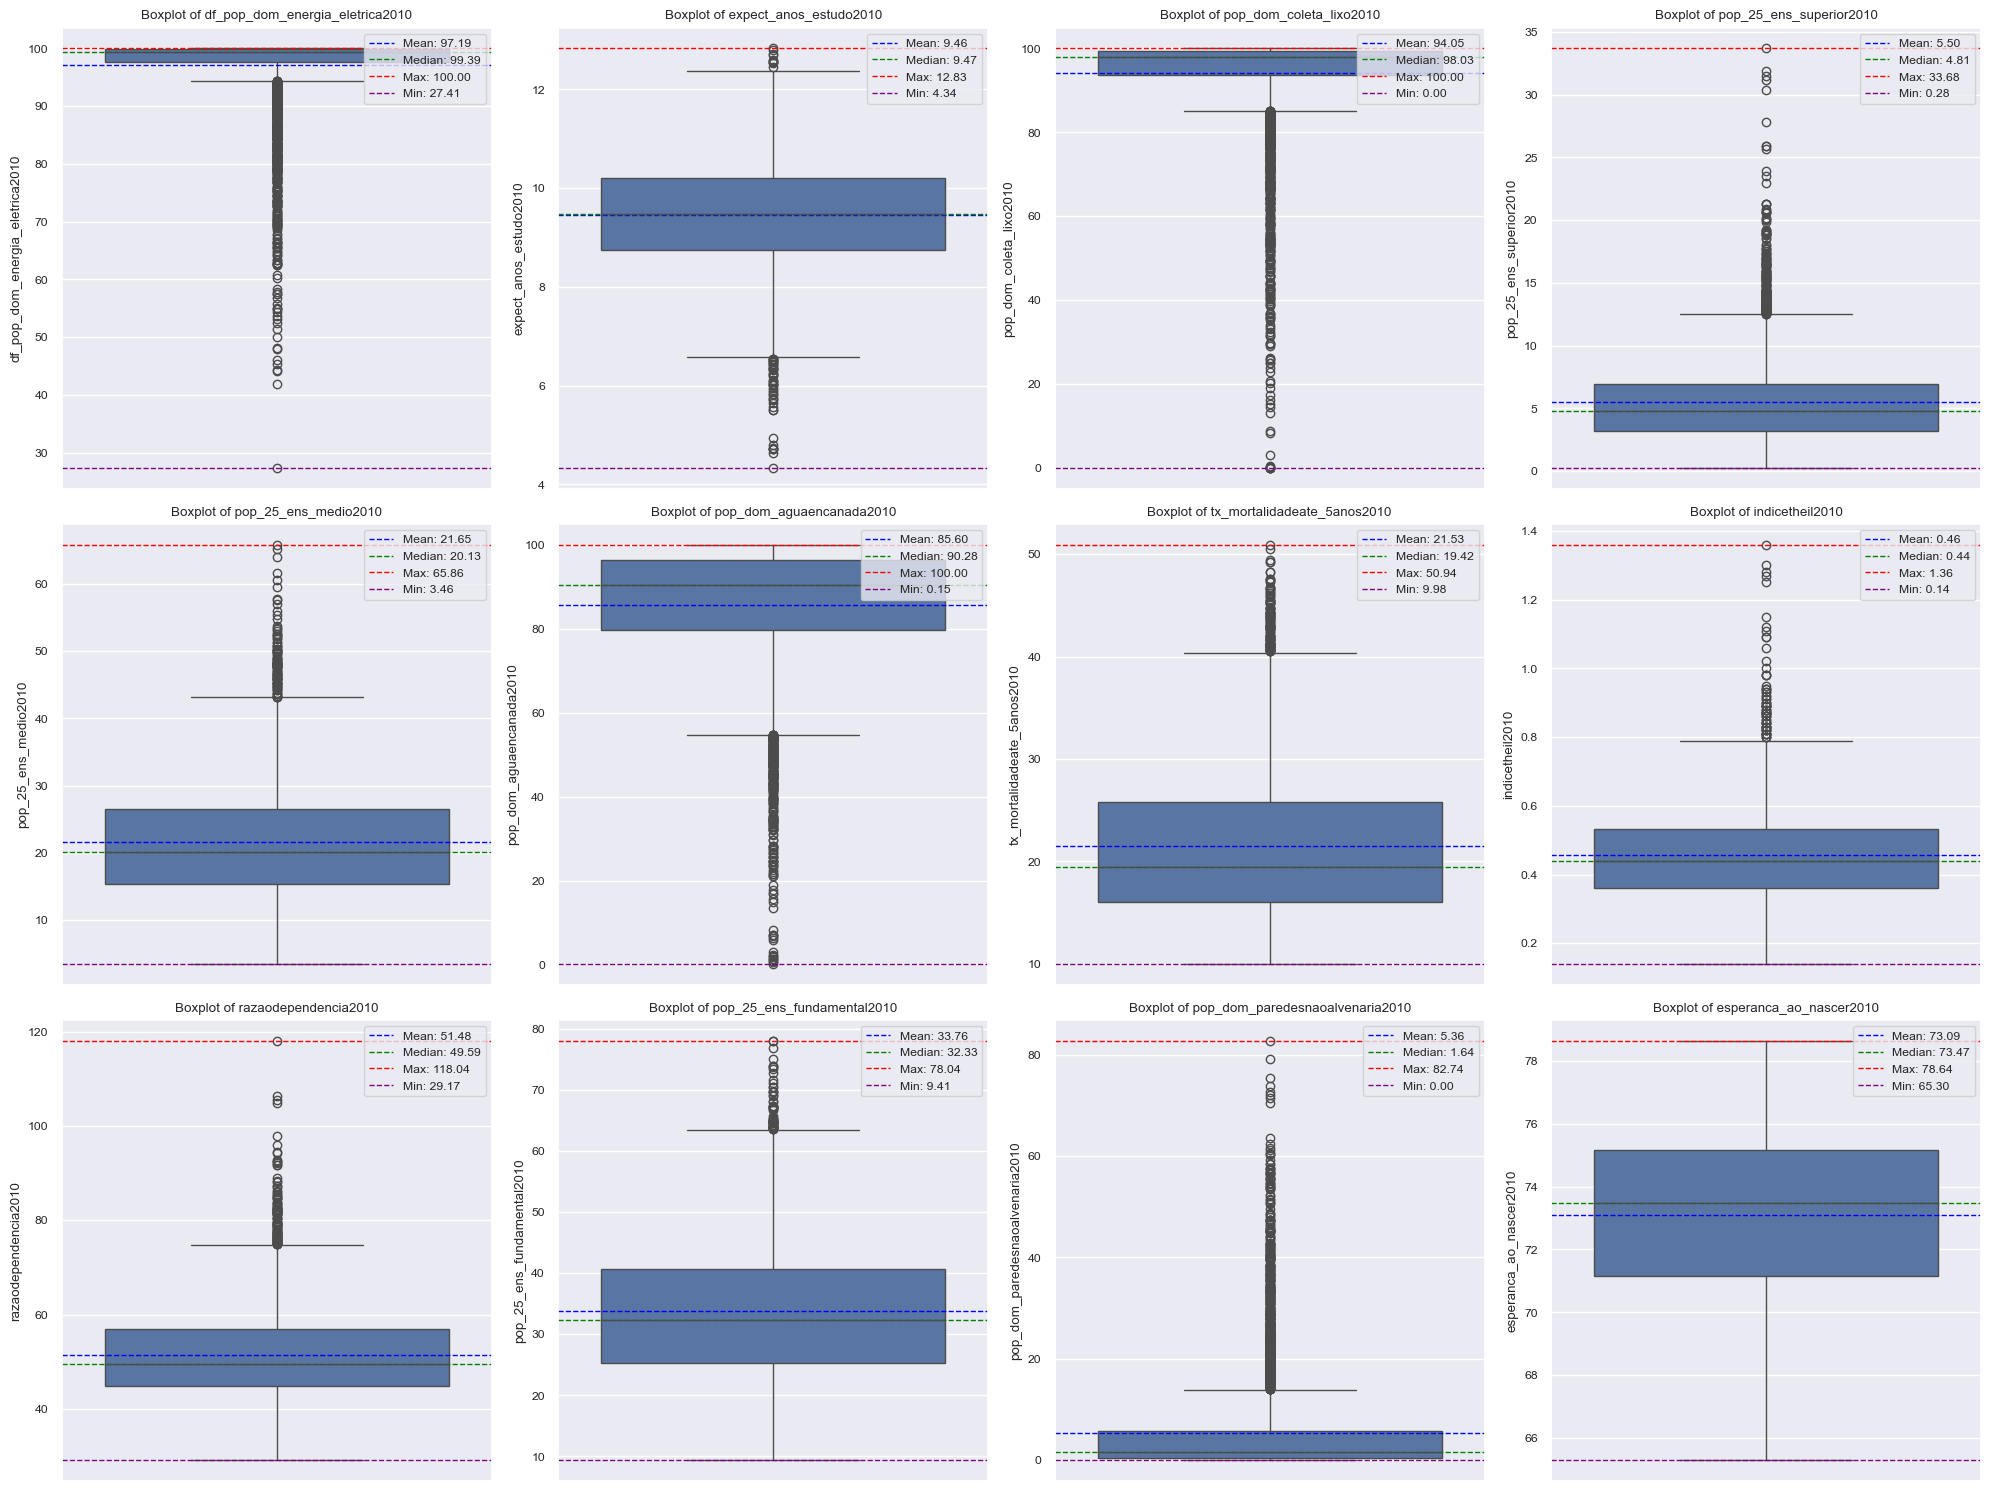

In [12]:
features_list =features[:12]
plot_boxplots_by_columns(df,features_list)


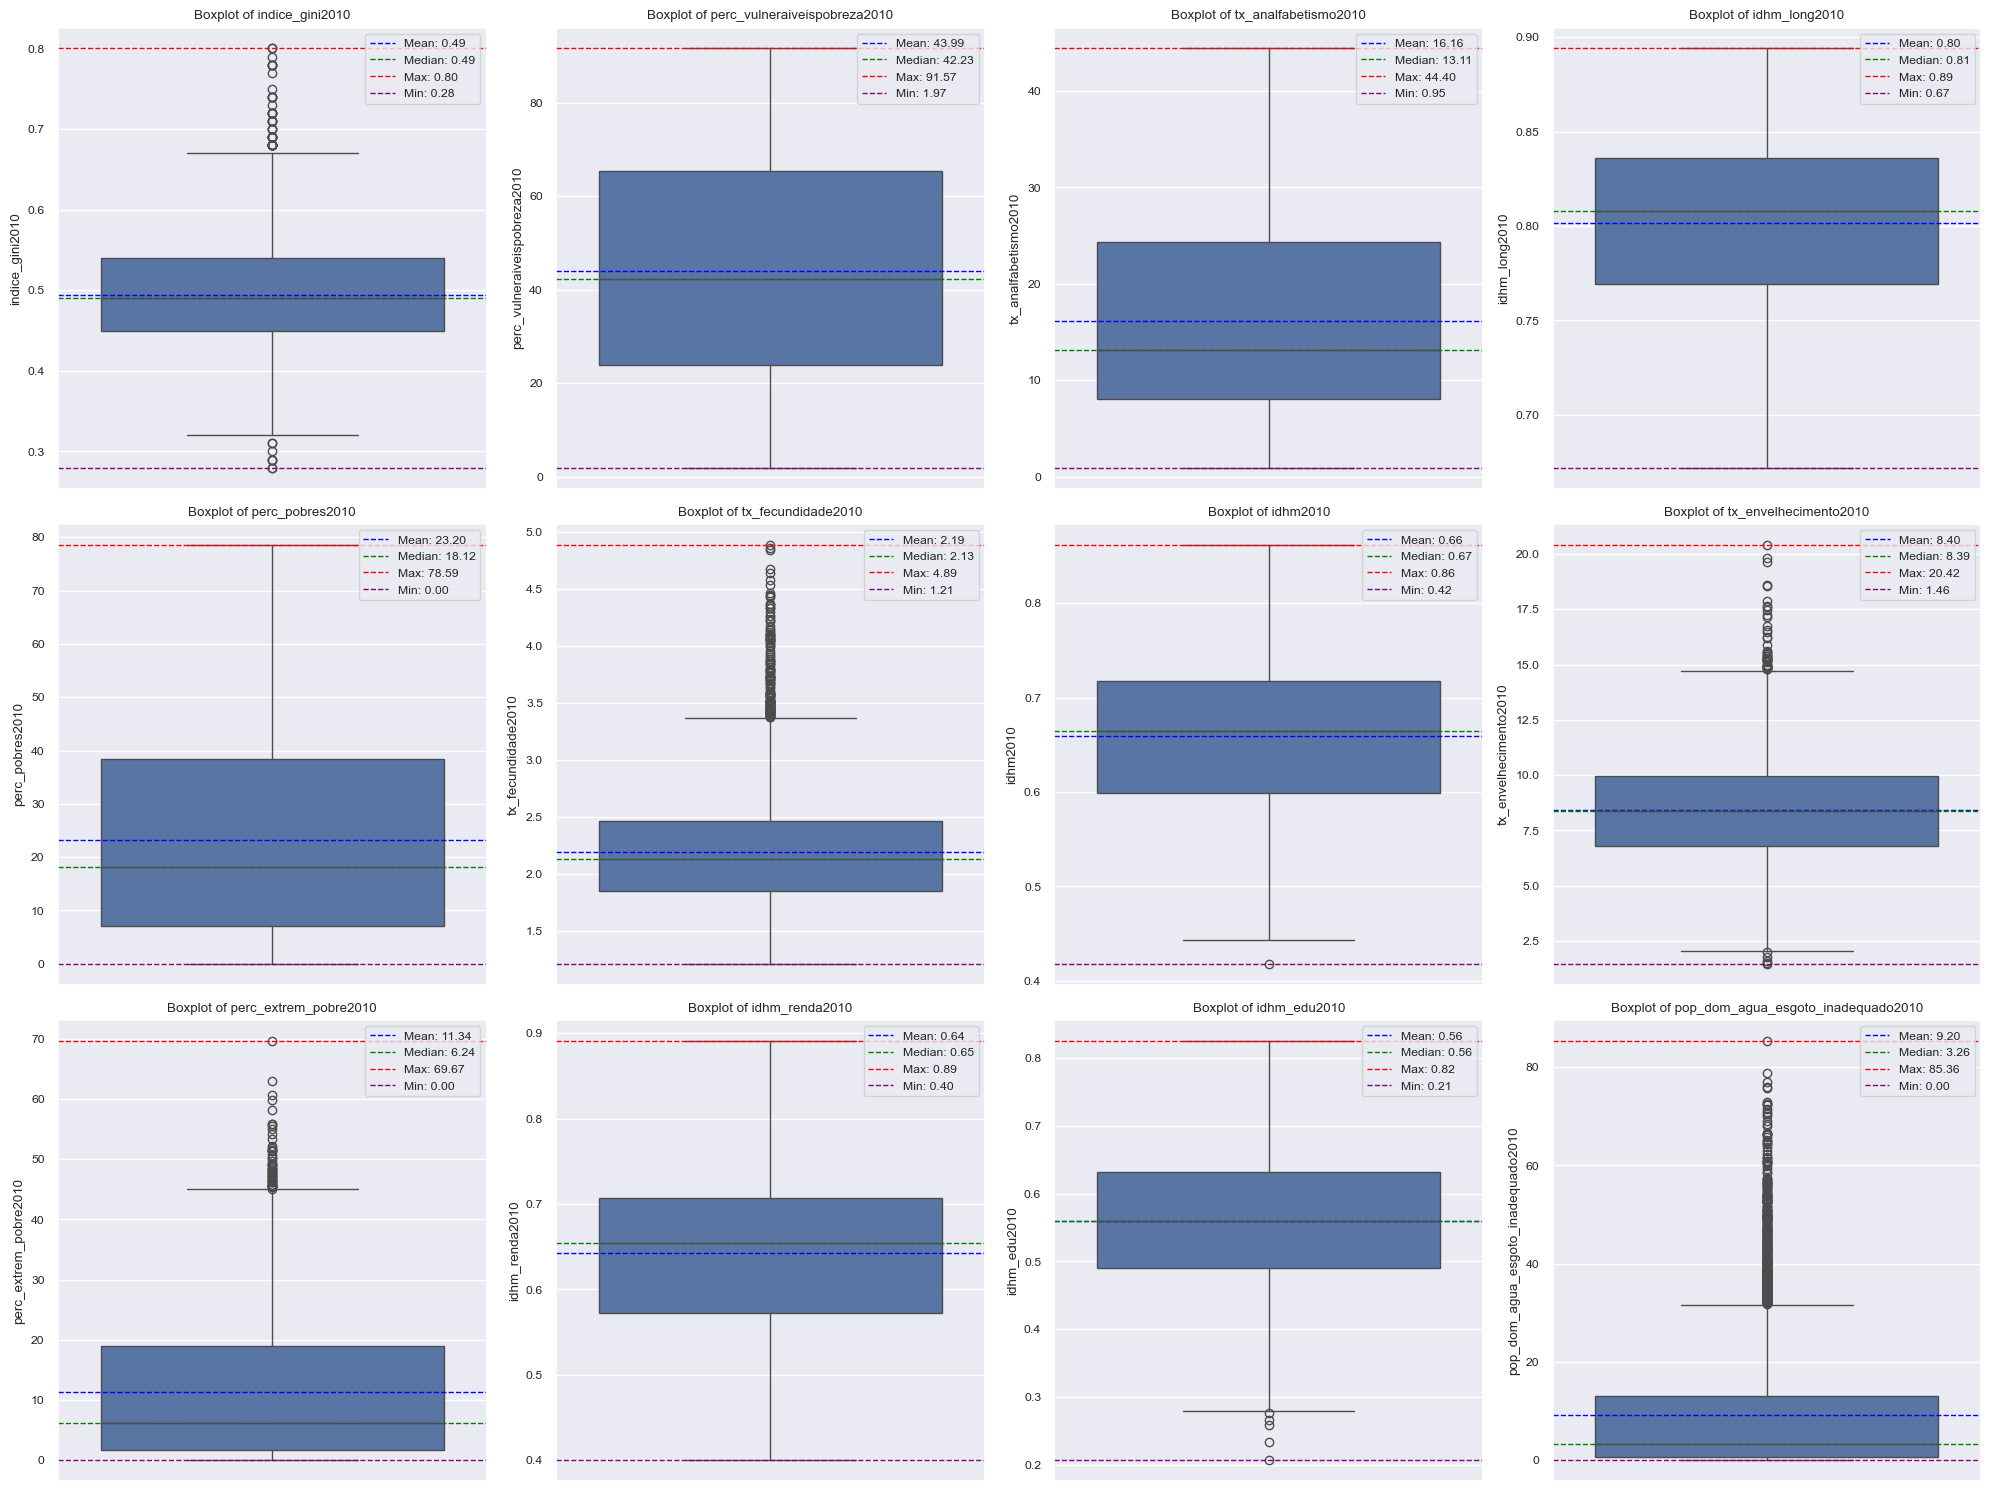

In [13]:
features_list =features[12:]

plot_boxplots_by_columns(df,features_list)


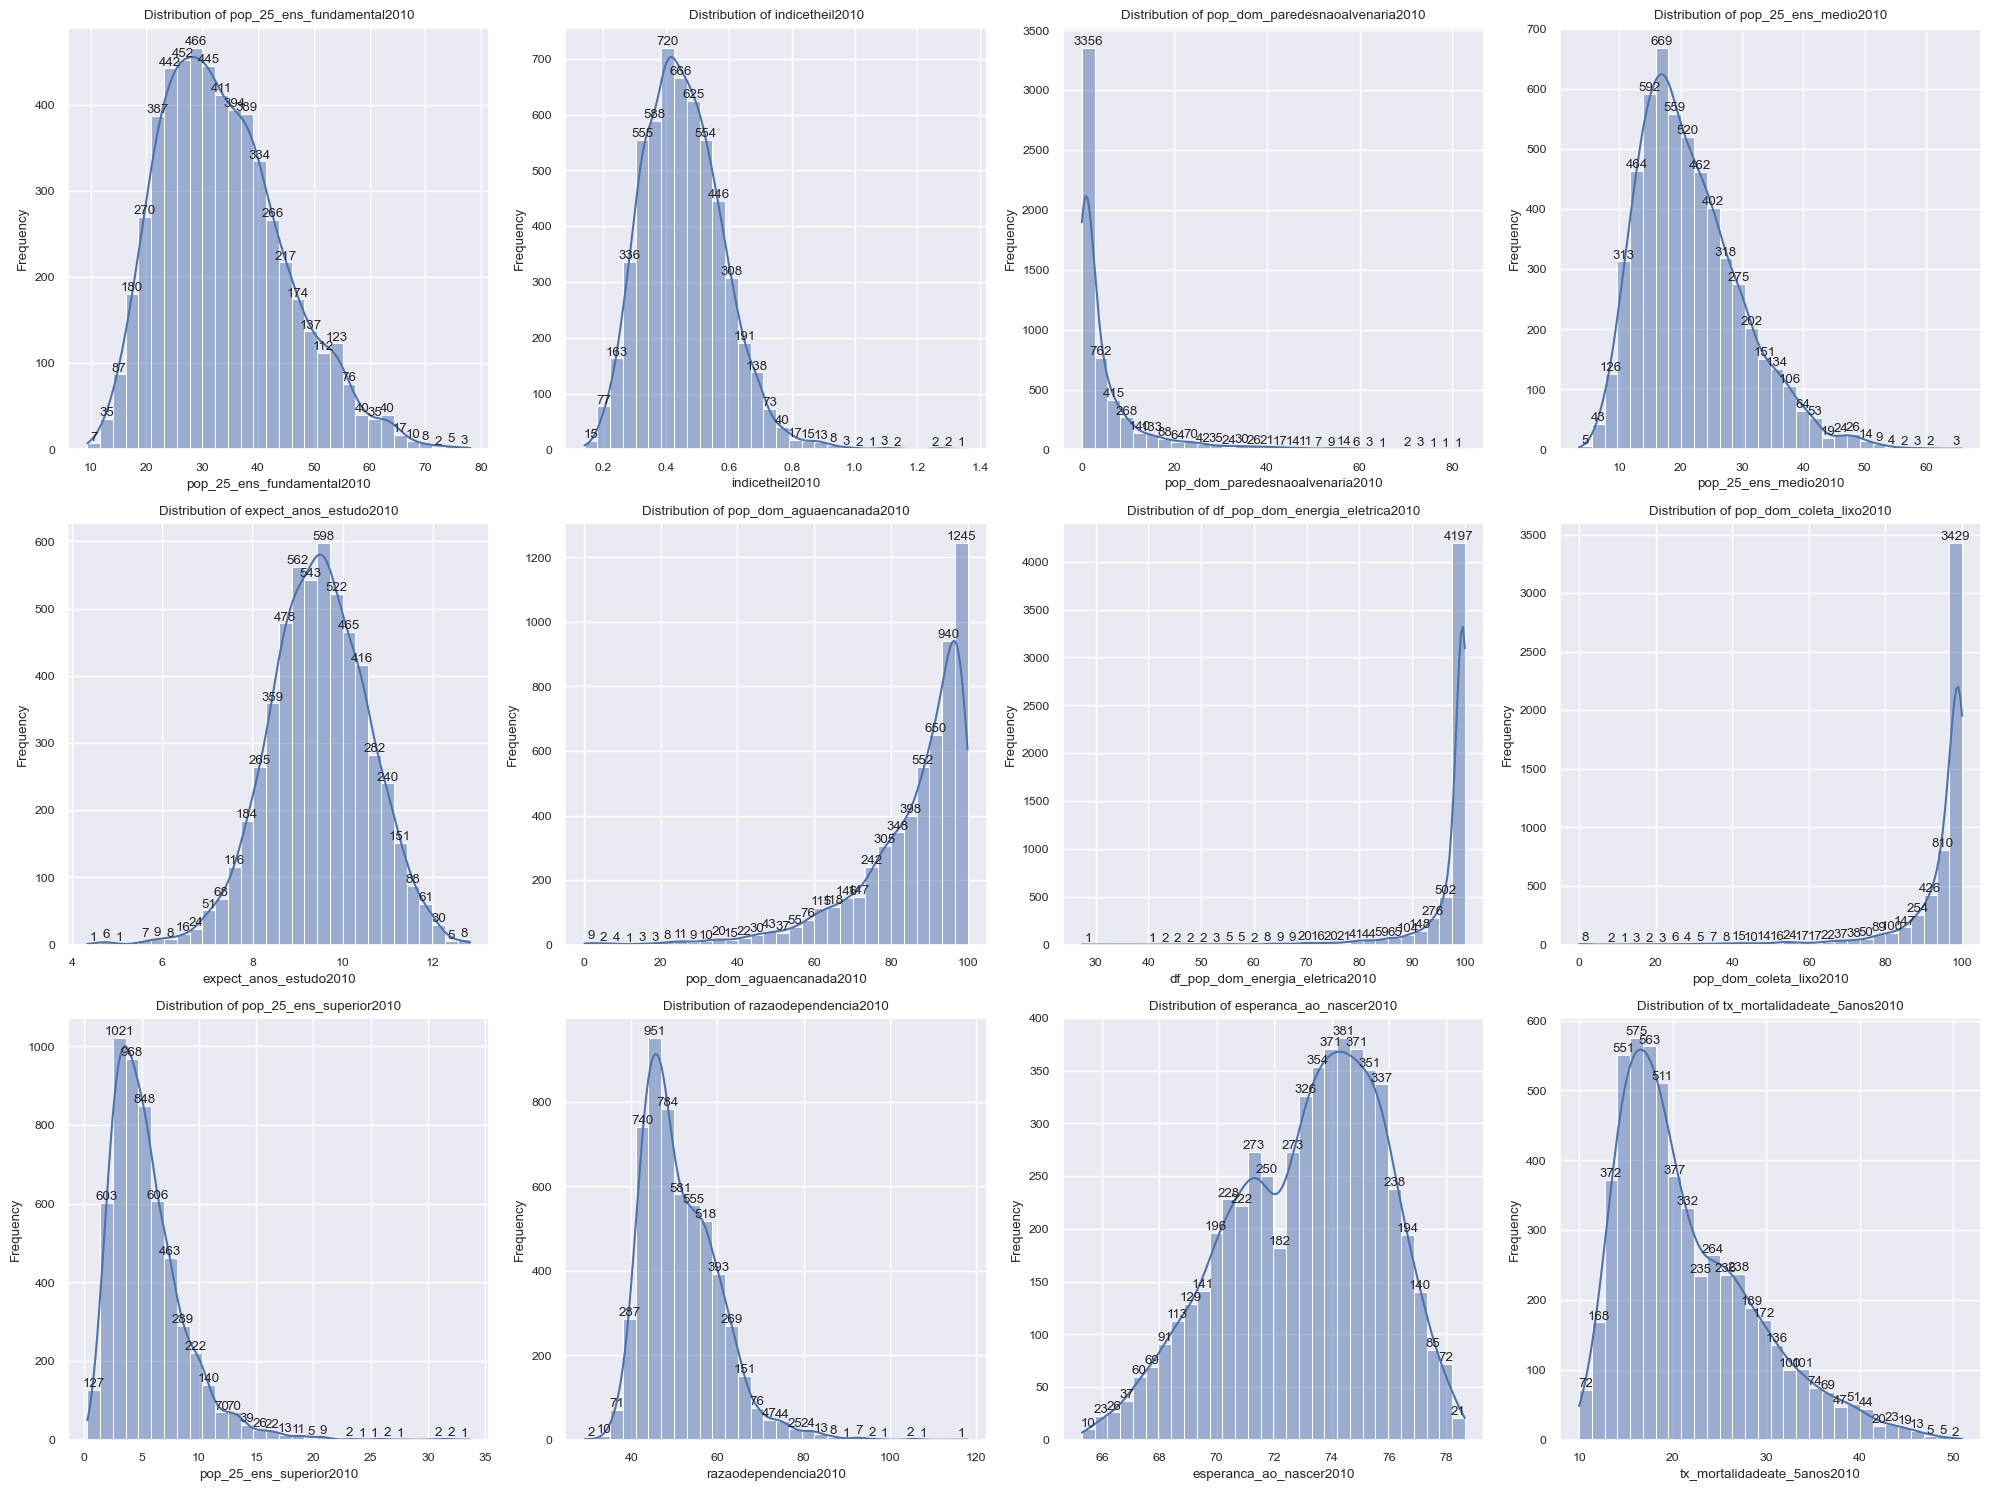

In [14]:
features_list =features[0:12]
plot_by_columns(df,features_list)

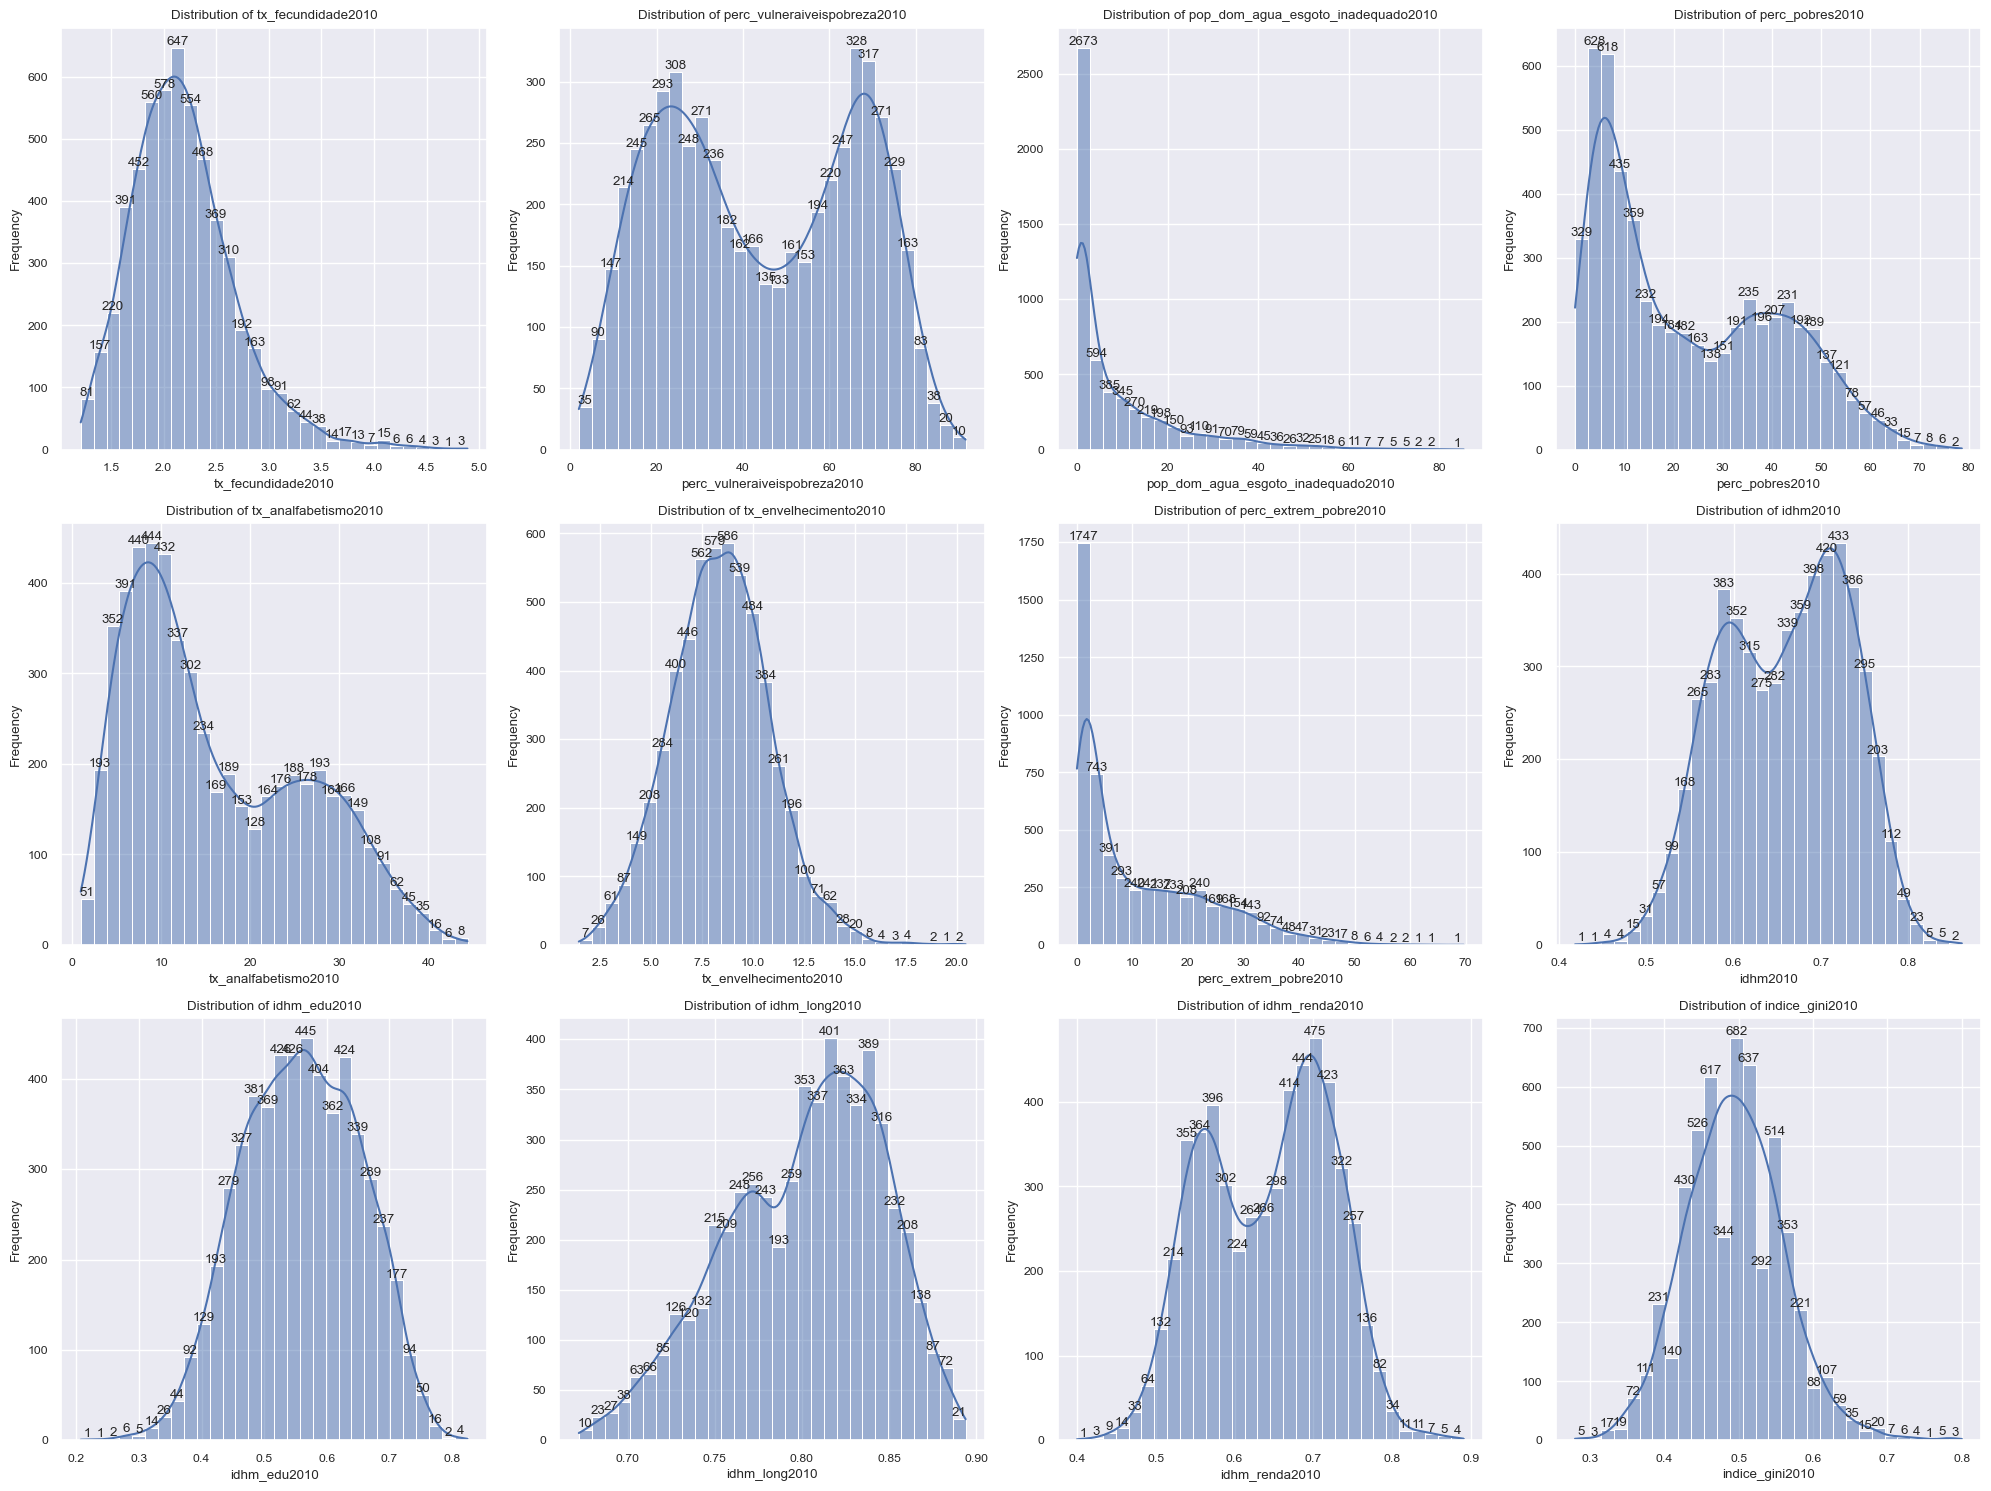

In [15]:
features_list =features[12:]
plot_by_columns(df,features_list)

### 2.4 
Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

Como as variáveis são de 2010 vamos substituir pela média dos municipios do mesmo estado, pois estes municípios não existiam em 2010. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Nome_UF                             5570 non-null   object 
 1   Codigo                              5570 non-null   int64  
 2   Nome_Município                      5570 non-null   object 
 3   capital                             5570 non-null   int64  
 4   latitude                            5570 non-null   float64
 5   longitude                           5570 non-null   float64
 6   pop_25_ens_fundamental2010          5564 non-null   float64
 7   indicetheil2010                     5564 non-null   float64
 8   pop_dom_paredesnaoalvenaria2010     5564 non-null   float64
 9   pop_25_ens_medio2010                5564 non-null   float64
 10  expect_anos_estudo2010              5564 non-null   float64
 11  pop_dom_aguaencanada2010            5564 no

In [17]:
null_counts = df.isnull().sum().reset_index()
null_counts = null_counts[null_counts[0]>0]
null_counts.rename(columns={0:'number_nulls'}, inplace=True)
null_counts['percentage_nulls'] = (null_counts['number_nulls'] / len(df)) * 100
null_counts

index  number_nulls  percentage_nulls
6           pop_25_ens_fundamental2010             6           0.10772
7                      indicetheil2010             6           0.10772
8      pop_dom_paredesnaoalvenaria2010             6           0.10772
9                 pop_25_ens_medio2010             6           0.10772
10              expect_anos_estudo2010             6           0.10772
11            pop_dom_aguaencanada2010             6           0.10772
12     df_pop_dom_energia_eletrica2010             6           0.10772
13             pop_dom_coleta_lixo2010             6           0.10772
14             pop_25_ens_superior2010             6           0.10772
15                razaodependencia2010             6           0.10772
16             esperanca_ao_nascer2010             6           0.10772
17         tx_mortalidadeate_5anos2010             6           0.10772
18                  tx_fecundidade2010             6           0.10772
19        perc_vulneraiveispobreza2010             6           0.10772
20  pop_dom_agua_esgoto_inadequado2010             6           0.10772
21                     perc_pobres2010             6           0.10772
22                tx_analfabetismo2010             6           0.10772
23               tx_envelhecimento2010             6           0.10772
24               perc_extrem_pobre2010             6           0.10772
25                            idhm2010             6           0.10772
26                        idhm_edu2010             6           0.10772
27                       idhm_long2010             6           0.10772
28                      idhm_renda2010             6           0.10772
29                     indice_gini2010             6           0.10772

In [18]:
indicadores = ['indice_gini2010', 'idhm2010','idhm_edu2010', 'idhm_long2010', 'idhm_renda2010', 
        'pop_25_ens_fundamental2010', 'indicetheil2010',
       'pop_dom_paredesnaoalvenaria2010', 'pop_25_ens_medio2010',
       'expect_anos_estudo2010', 'pop_dom_aguaencanada2010',
       'df_pop_dom_energia_eletrica2010', 'pop_dom_coleta_lixo2010',
       'pop_25_ens_superior2010', 'razaodependencia2010',
       'esperanca_ao_nascer2010', 'tx_mortalidadeate_5anos2010',
       'tx_fecundidade2010', 'perc_vulneraiveispobreza2010',
       'pop_dom_agua_esgoto_inadequado2010', 'perc_pobres2010',
       'tx_analfabetismo2010', 'tx_envelhecimento2010',
       'perc_extrem_pobre2010']

for i in indicadores:
    df[i] = df[i].fillna(df.groupby(['Nome_UF'])[i].transform('mean'))

In [19]:
fill_zero_columns = set(null_counts['index'].tolist()) - set(indicadores)

In [20]:
for i in  fill_zero_columns:
    df[i] = df[i].fillna(0)

In [21]:
null_counts = df.isnull().sum().reset_index()
null_counts = null_counts[null_counts[0]>0]
null_counts.rename(columns={0:'number_nulls'}, inplace=True)
null_counts['percentage_nulls'] = (null_counts['number_nulls'] / len(df)) * 100
null_counts

Empty DataFrame
Columns: [index, number_nulls, percentage_nulls]
Index: []

Scale features que não estão entre 0 e 1 

In [22]:
df.iloc[0:, 6:15].describe()

pop_25_ens_fundamental2010  indicetheil2010  \
count                 5570.000000      5570.000000   
mean                    33.755953         0.455702   
std                     11.075552         0.130340   
min                      9.410000         0.140000   
25%                     25.340000         0.360000   
50%                     32.335000         0.440000   
75%                     40.605000         0.537500   
max                     78.040000         1.360000   

       pop_dom_paredesnaoalvenaria2010  pop_25_ens_medio2010  \
count                      5570.000000           5570.000000   
mean                          5.357763             21.645456   
std                           9.383550              8.501713   
min                           0.000000              3.460000   
25%                           0.420000             15.320000   
50%                           1.640000             20.130000   
75%                           5.817500             26.440000   
max                          82.740000             65.860000   

       expect_anos_estudo2010  pop_dom_aguaencanada2010  \
count             5570.000000               5570.000000   
mean                 9.463597                 85.598861   
std                  1.098120                 14.716671   
min                  4.340000                  0.150000   
25%                  8.750000                 79.627500   
50%                  9.470000                 90.280000   
75%                 10.210000                 96.257500   
max                 12.830000                100.000000   

       df_pop_dom_energia_eletrica2010  pop_dom_coleta_lixo2010  \
count                      5570.000000              5570.000000   
mean                         97.187171                94.050103   
std                           6.024438                11.043196   
min                          27.410000                 0.000000   
25%                          97.640000                93.720000   
50%                          99.390000                98.030000   
75%                          99.870000                99.490000   
max                         100.000000               100.000000   

       pop_25_ens_superior2010  
count              5570.000000  
mean                  5.496974  
std                   3.257239  
min                   0.280000  
25%                   3.240000  
50%                   4.815000  
75%                   6.960000  
max                  33.680000

In [23]:
df.iloc[0:, 15:].describe()

razaodependencia2010  esperanca_ao_nascer2010  \
count           5570.000000              5570.000000   
mean              51.483426                73.089988   
std                8.947396                 2.680596   
min               29.170000                65.300000   
25%               44.880000                71.152500   
50%               49.590000                73.475000   
75%               56.870000                75.160000   
max              118.040000                78.640000   

       tx_mortalidadeate_5anos2010  tx_fecundidade2010  \
count                  5570.000000         5570.000000   
mean                     21.531492            2.189997   
std                       7.321272            0.502932   
min                       9.980000            1.210000   
25%                      16.040000            1.850000   
50%                      19.420000            2.130000   
75%                      25.820000            2.460000   
max                      50.940000            4.890000   

       perc_vulneraiveispobreza2010  pop_dom_agua_esgoto_inadequado2010  \
count                   5570.000000                         5570.000000   
mean                      43.979983                            9.201662   
std                       22.437232                           12.840774   
min                        1.970000                            0.000000   
25%                       23.937500                            0.530000   
50%                       42.225000                            3.260000   
75%                       65.300000                           13.000000   
max                       91.570000                           85.360000   

       perc_pobres2010  tx_analfabetismo2010  tx_envelhecimento2010  \
count      5570.000000           5570.000000            5570.000000   
mean         23.200292             16.153046               8.396842   
std          17.914215              9.837879               2.422729   
min           0.000000              0.950000               1.460000   
25%           7.030000              8.080000               6.780000   
50%          18.105000             13.110000               8.380000   
75%          38.510000             24.305000               9.960000   
max          78.590000             44.400000              20.420000   

       perc_extrem_pobre2010     idhm2010  idhm_edu2010  idhm_long2010  \
count            5570.000000  5570.000000   5570.000000    5570.000000   
mean               11.339456     0.659177      0.559099       0.801581   
std                11.763590     0.071995      0.093319       0.044679   
min                 0.000000     0.418000      0.207000       0.672000   
25%                 1.642500     0.599000      0.490000       0.769000   
50%                 6.235000     0.665000      0.560000       0.808000   
75%                19.045000     0.718000      0.631000       0.836000   
max                69.670000     0.862000      0.825000       0.894000   

       idhm_renda2010  indice_gini2010  
count     5570.000000      5570.000000  
mean         0.642914         0.494381  
std          0.080656         0.066064  
min          0.400000         0.280000  
25%          0.572000         0.450000  
50%          0.654000         0.490000  
75%          0.707000         0.540000  
max          0.891000         0.800000

In [24]:
statistics = df.iloc[0:, 6:].describe(include = 'all')

In [25]:
numeric_features_to_scale = [column for column in statistics.columns if statistics.loc['max'][column] > 1]

print(f"""As feateres que precisam ser normalizadas são: """) 
numeric_features_to_scale


As feateres que precisam ser normalizadas são: 


['pop_25_ens_fundamental2010',
 'indicetheil2010',
 'pop_dom_paredesnaoalvenaria2010',
 'pop_25_ens_medio2010',
 'expect_anos_estudo2010',
 'pop_dom_aguaencanada2010',
 'df_pop_dom_energia_eletrica2010',
 'pop_dom_coleta_lixo2010',
 'pop_25_ens_superior2010',
 'razaodependencia2010',
 'esperanca_ao_nascer2010',
 'tx_mortalidadeate_5anos2010',
 'tx_fecundidade2010',
 'perc_vulneraiveispobreza2010',
 'pop_dom_agua_esgoto_inadequado2010',
 'perc_pobres2010',
 'tx_analfabetismo2010',
 'tx_envelhecimento2010',
 'perc_extrem_pobre2010']

In [26]:
scaler = MinMaxScaler()
df_normalized = df.copy() 

df_normalized[numeric_features_to_scale] = scaler.fit_transform(df_normalized[numeric_features_to_scale])

In [27]:
df_normalized.head()

Nome_UF   Codigo           Nome_Município  capital  latitude  longitude  \
0  Rondônia  1100015    Alta Floresta D'Oeste        0 -11.92830   -61.9953   
1  Rondônia  1100379  Alto Alegre dos Parecis        0 -12.13200   -61.8350   
2  Rondônia  1100403             Alto Paraíso        0  -9.71429   -63.3188   
3  Rondônia  1100346         Alvorada D'Oeste        0 -11.34630   -62.2847   
4  Rondônia  1100023                Ariquemes        0  -9.90571   -63.0325   

   pop_25_ens_fundamental2010  indicetheil2010  \
0                    0.291126         0.377049   
1                    0.167128         0.303279   
2                    0.219729         0.327869   
3                    0.304094         0.327869   
4                    0.527612         0.303279   

   pop_dom_paredesnaoalvenaria2010  pop_25_ens_medio2010  ...  \
0                         0.086778              0.252083  ...   
1                         0.021634              0.139744  ...   
2                         0.082548              0.161058  ...   
3                         0.045202              0.252244  ...   
4                         0.067924              0.448558  ...   

   pop_dom_agua_esgoto_inadequado2010  perc_pobres2010  tx_analfabetismo2010  \
0                            0.109067         0.331340              0.254085   
1                            0.184278         0.430589              0.289528   
2                            0.182521         0.229419              0.249942   
3                            0.086340         0.300674              0.276410   
4                            0.133552         0.146838              0.159954   

   tx_envelhecimento2010  perc_extrem_pobre2010  idhm2010  idhm_edu2010  \
0               0.231013               0.205110     0.641         0.526   
1               0.179325               0.302856     0.592         0.443   
2               0.182489               0.119707     0.625         0.457   
3               0.245781               0.168078     0.643         0.534   
4               0.152954               0.062581     0.702         0.600   

   idhm_long2010  idhm_renda2010  indice_gini2010  
0          0.763           0.657             0.58  
1          0.777           0.603             0.54  
2          0.804           0.664             0.54  
3          0.763           0.654             0.53  
4          0.806           0.716             0.53  

[5 rows x 30 columns]

In [28]:
df_normalized.iloc[0:, 6:15].describe()

pop_25_ens_fundamental2010  indicetheil2010  \
count                 5570.000000      5570.000000   
mean                     0.354742         0.258772   
std                      0.161381         0.106836   
min                      0.000000         0.000000   
25%                      0.232114         0.180328   
50%                      0.334038         0.245902   
75%                      0.454539         0.325820   
max                      1.000000         1.000000   

       pop_dom_paredesnaoalvenaria2010  pop_25_ens_medio2010  \
count                      5570.000000           5570.000000   
mean                          0.064754              0.291434   
std                           0.113410              0.136245   
min                           0.000000              0.000000   
25%                           0.005076              0.190064   
50%                           0.019821              0.267147   
75%                           0.070311              0.368269   
max                           1.000000              1.000000   

       expect_anos_estudo2010  pop_dom_aguaencanada2010  \
count             5570.000000               5570.000000   
mean                 0.603486                  0.855772   
std                  0.129343                  0.147388   
min                  0.000000                  0.000000   
25%                  0.519435                  0.795969   
50%                  0.604240                  0.902654   
75%                  0.691402                  0.962519   
max                  1.000000                  1.000000   

       df_pop_dom_energia_eletrica2010  pop_dom_coleta_lixo2010  \
count                      5570.000000              5570.000000   
mean                          0.961250                 0.940501   
std                           0.082993                 0.110432   
min                           0.000000                 0.000000   
25%                           0.967489                 0.937200   
50%                           0.991597                 0.980300   
75%                           0.998209                 0.994900   
max                           1.000000                 1.000000   

       pop_25_ens_superior2010  
count              5570.000000  
mean                  0.156197  
std                   0.097522  
min                   0.000000  
25%                   0.088623  
50%                   0.135778  
75%                   0.200000  
max                   1.000000

In [29]:
df_normalized.iloc[0:, 15: ].describe()

razaodependencia2010  esperanca_ao_nascer2010  \
count           5570.000000              5570.000000   
mean               0.251079                 0.583957   
std                0.100680                 0.200944   
min                0.000000                 0.000000   
25%                0.176775                 0.438718   
50%                0.229774                 0.612819   
75%                0.311691                 0.739130   
max                1.000000                 1.000000   

       tx_mortalidadeate_5anos2010  tx_fecundidade2010  \
count                  5570.000000         5570.000000   
mean                      0.282019            0.266304   
std                       0.178742            0.136666   
min                       0.000000            0.000000   
25%                       0.147949            0.173913   
50%                       0.230469            0.250000   
75%                       0.386719            0.339674   
max                       1.000000            1.000000   

       perc_vulneraiveispobreza2010  pop_dom_agua_esgoto_inadequado2010  \
count                   5570.000000                         5570.000000   
mean                       0.468861                            0.107798   
std                        0.250416                            0.150431   
min                        0.000000                            0.000000   
25%                        0.245173                            0.006209   
50%                        0.449275                            0.038191   
75%                        0.706808                            0.152296   
max                        1.000000                            1.000000   

       perc_pobres2010  tx_analfabetismo2010  tx_envelhecimento2010  \
count      5570.000000           5570.000000            5570.000000   
mean          0.295207              0.349897               0.365867   
std           0.227945              0.226418               0.127781   
min           0.000000              0.000000               0.000000   
25%           0.089452              0.164097               0.280591   
50%           0.230373              0.279862               0.364979   
75%           0.490011              0.537514               0.448312   
max           1.000000              1.000000               1.000000   

       perc_extrem_pobre2010     idhm2010  idhm_edu2010  idhm_long2010  \
count            5570.000000  5570.000000   5570.000000    5570.000000   
mean                0.162760     0.659177      0.559099       0.801581   
std                 0.168847     0.071995      0.093319       0.044679   
min                 0.000000     0.418000      0.207000       0.672000   
25%                 0.023575     0.599000      0.490000       0.769000   
50%                 0.089493     0.665000      0.560000       0.808000   
75%                 0.273360     0.718000      0.631000       0.836000   
max                 1.000000     0.862000      0.825000       0.894000   

       idhm_renda2010  indice_gini2010  
count     5570.000000      5570.000000  
mean         0.642914         0.494381  
std          0.080656         0.066064  
min          0.400000         0.280000  
25%          0.572000         0.450000  
50%          0.654000         0.490000  
75%          0.707000         0.540000  
max          0.891000         0.800000

In [30]:
numeric_features =  df_normalized.select_dtypes('float').columns.tolist()
numeric_features.remove('latitude')
numeric_features.remove('longitude')

numeric_features

['pop_25_ens_fundamental2010',
 'indicetheil2010',
 'pop_dom_paredesnaoalvenaria2010',
 'pop_25_ens_medio2010',
 'expect_anos_estudo2010',
 'pop_dom_aguaencanada2010',
 'df_pop_dom_energia_eletrica2010',
 'pop_dom_coleta_lixo2010',
 'pop_25_ens_superior2010',
 'razaodependencia2010',
 'esperanca_ao_nascer2010',
 'tx_mortalidadeate_5anos2010',
 'tx_fecundidade2010',
 'perc_vulneraiveispobreza2010',
 'pop_dom_agua_esgoto_inadequado2010',
 'perc_pobres2010',
 'tx_analfabetismo2010',
 'tx_envelhecimento2010',
 'perc_extrem_pobre2010',
 'idhm2010',
 'idhm_edu2010',
 'idhm_long2010',
 'idhm_renda2010',
 'indice_gini2010']

In [31]:
correlation_matrix = df_normalized[numeric_features].corr()

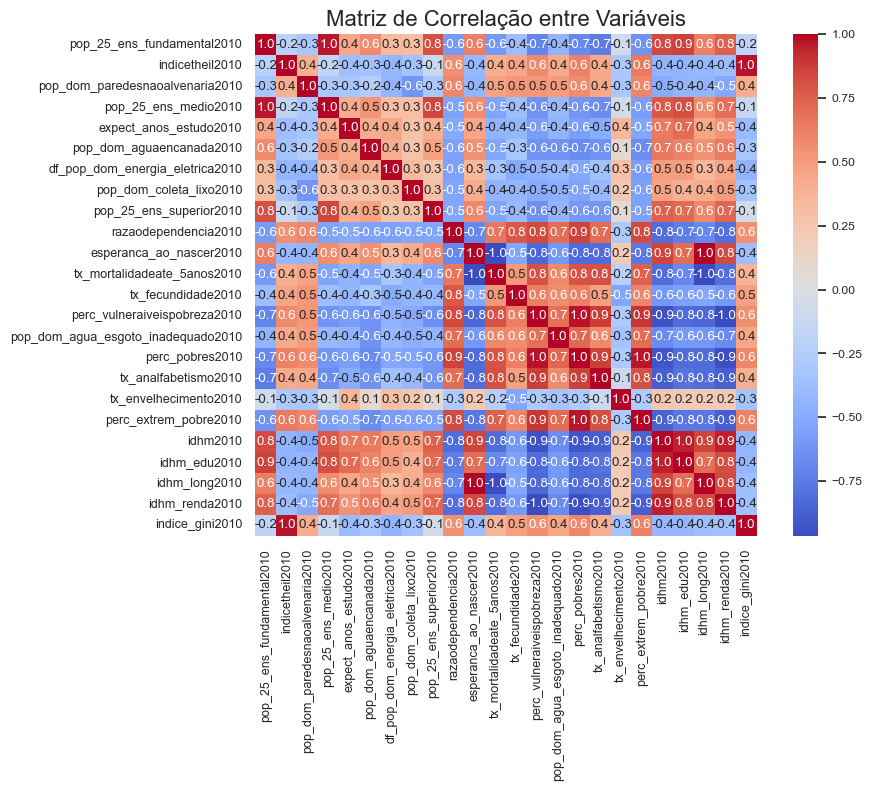

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de Correlação entre Variáveis", fontsize=16)
plt.xticks(rotation=90, fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# Clusterização

### 3.1 
Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:
- K-Médias
- DBScan


In [33]:
from sklearn.cluster import DBSCAN, KMeans
import numpy as np
from sklearn.metrics import silhouette_score
import optuna
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

/Users/anapaula/projects/infnet_clusterizacao_avaliacao/.env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
X = df_normalized[numeric_features]

In [35]:
X

pop_25_ens_fundamental2010  indicetheil2010  \
0                       0.291126         0.377049   
1                       0.167128         0.303279   
2                       0.219729         0.327869   
3                       0.304094         0.327869   
4                       0.527612         0.303279   
...                          ...              ...   
5565                    0.406819         0.180328   
5566                    0.349847         0.188525   
5567                    0.393414         0.213115   
5568                    0.236486         0.180328   
5569                    0.880664         0.508197   

      pop_dom_paredesnaoalvenaria2010  pop_25_ens_medio2010  \
0                            0.086778              0.252083   
1                            0.021634              0.139744   
2                            0.082548              0.161058   
3                            0.045202              0.252244   
4                            0.067924              0.448558   
...                               ...                   ...   
5565                         0.000000              0.329808   
5566                         0.033237              0.307692   
5567                         0.045806              0.307372   
5568                         0.038434              0.127083   
5569                         0.016316              0.832372   

      expect_anos_estudo2010  pop_dom_aguaencanada2010  \
0                   0.510012                  0.936805   
1                   0.603062                  0.935804   
2                   0.385159                  0.952829   
3                   0.640754                  0.943015   
4                   0.570082                  0.985378   
...                      ...                       ...   
5565                0.679623                  0.868703   
5566                0.674912                  0.985979   
5567                0.724382                  0.852278   
5568                0.603062                  0.779069   
5569                0.651355                  0.981272   

      df_pop_dom_energia_eletrica2010  pop_dom_coleta_lixo2010  \
0                            0.917068                   0.9405   
1                            0.877531                   0.9279   
2                            0.959499                   0.8749   
3                            0.973275                   0.9535   
4                            0.980438                   0.9672   
...                               ...                      ...   
5565                         0.997658                   0.9932   
5566                         0.995867                   0.9878   
5567                         0.996969                   0.9921   
5568                         0.966800                   1.0000   
5569                         0.998760                   0.9887   

      pop_25_ens_superior2010  razaodependencia2010  ...  \
0                    0.156587              0.204794  ...   
1                    0.085629              0.257567  ...   
2                    0.082036              0.270057  ...   
3                    0.154192              0.221109  ...   
4                    0.235030              0.197029  ...   
...                       ...                   ...  ...   
5565                 0.161377              0.179363  ...   
5566                 0.176347              0.148644  ...   
5567                 0.074850              0.243389  ...   
5568                 0.079341              0.242827  ...   
5569                 0.708683              0.123439  ...   

      pop_dom_agua_esgoto_inadequado2010  perc_pobres2010  \
0                               0.109067         0.331340   
1                               0.184278         0.430589   
2                               0.182521         0.229419   
3                               0.086340         0.300674   
4                               0.133552         0.146838   
...                                

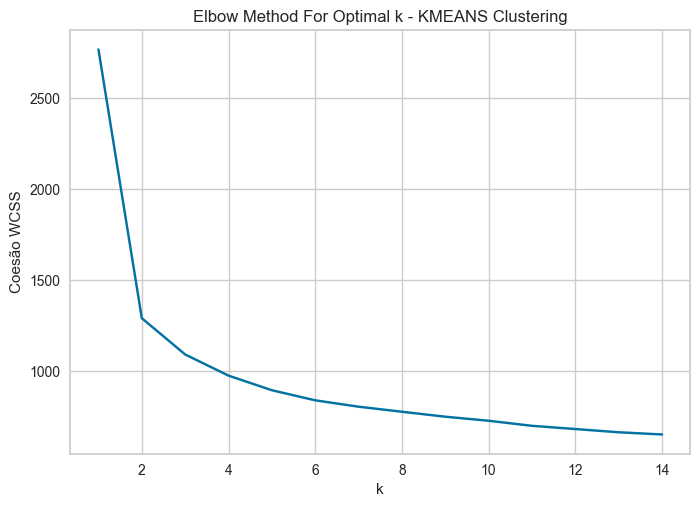

In [36]:
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k, random_state=42)
    km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Coesão WCSS')
plt.title('Elbow Method For Optimal k - KMEANS Clustering')
plt.show()

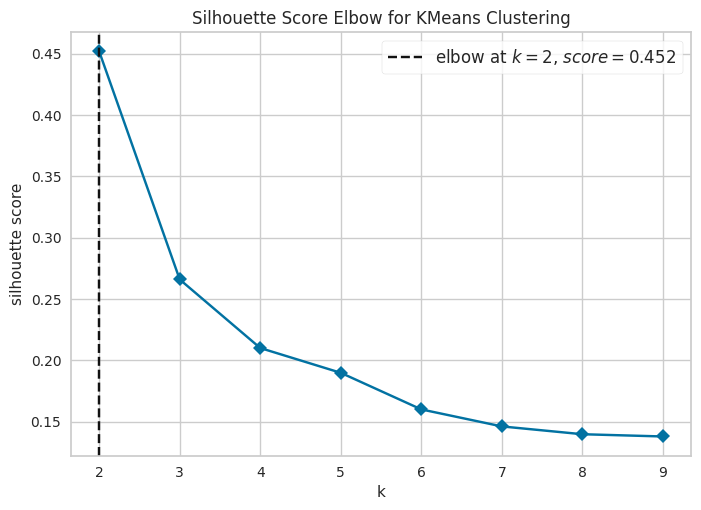

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [37]:
plt.rcParams['font.family'] ='DejaVu Sans'
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X)
visualizer.poof()

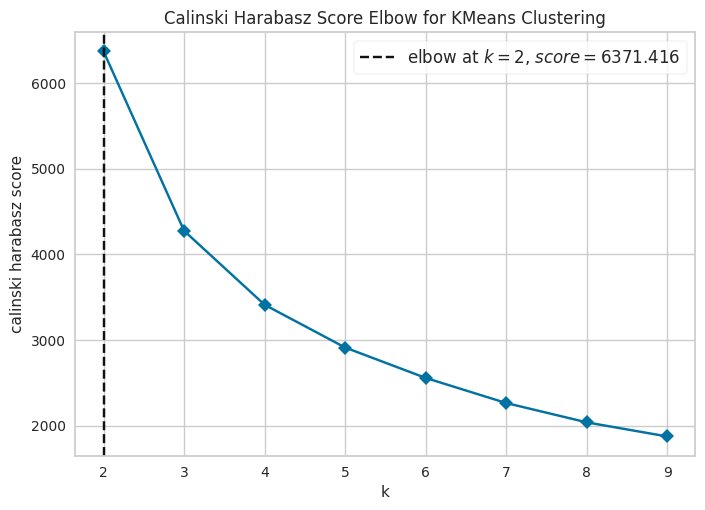

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [38]:
plt.rcParams['font.family'] ='DejaVu Sans'
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(X)
visualizer.poof()

In [39]:
kmeans = KMeans(n_clusters=2, random_state=42 )
df_normalized['KMeans_Cluster'] = kmeans.fit_predict(X)

In [40]:
df_normalized.groupby(['KMeans_Cluster']).count()['Nome_UF']

KMeans_Cluster
0    2277
1    3293
Name: Nome_UF, dtype: int64

In [41]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(X, df_normalized['KMeans_Cluster'])
db_index = davies_bouldin_score(X, df_normalized['KMeans_Cluster'])
ch_index = calinski_harabasz_score(X, df_normalized['KMeans_Cluster'])

print("Silhouette Coefficient:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Coefficient: 0.4519133597548308
Davies-Bouldin Index: 0.878004017079918
Calinski-Harabasz Index: 6371.416029293783


O termo separação, por outro lado, se refere ao quão distintos ou separados estão os clusters uns dos outros

In [ ]:
centroide_global = np.mean(X, axis=0)

separacao = np.sum([np.linalg.norm(centroide - centroide_global) ** 2 for centroide in kmeans.cluster_centers_])

print("A separação dos clusters é:", separacao)

A separação dos clusters é: 0.5672615954274243


In [44]:
df_normalized[df_normalized['KMeans_Cluster']==1].iloc[0:,0:4]

Nome_UF   Codigo    Nome_Município  capital
2             Rondônia  1100403      Alto Paraíso        0
3             Rondônia  1100346  Alvorada D'Oeste        0
4             Rondônia  1100023         Ariquemes        0
6             Rondônia  1100031            Cabixi        0
7             Rondônia  1100601       Cacaulândia        0
...                ...      ...               ...      ...
5565             Goiás  5222005        Vianópolis        0
5566             Goiás  5222054    Vicentinópolis        0
5567             Goiás  5222203          Vila Boa        0
5568             Goiás  5222302     Vila Propício        0
5569  Distrito Federal  5300108          Brasília        1

[3293 rows x 4 columns]

In [45]:
def objective_dbscan(trial):
    
    eps = trial.suggest_float("eps", 0.1, 0.5, step=0.01,log=False)
    min_samples = trial.suggest_int("min_samples", 200, 400, step=2)

    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X)
    
    unique_labels = set(labels) - {-1}
    if len(unique_labels) < 2:
        return -1.0
    
    score = silhouette_score(X, labels)
    return score

In [46]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_dbscan, n_trials=1000)

[I 2024-12-19 20:00:40,836] A new study created in memory with name: no-name-2a10b6b6-d974-49e8-bb92-4b37e509bacb
[I 2024-12-19 20:00:40,931] Trial 0 finished with value: -1.0 and parameters: {'eps': 0.49, 'min_samples': 236}. Best is trial 0 with value: -1.0.
[I 2024-12-19 20:00:40,972] Trial 1 finished with value: -1.0 and parameters: {'eps': 0.36, 'min_samples': 220}. Best is trial 0 with value: -1.0.
[I 2024-12-19 20:00:40,999] Trial 2 finished with value: -1.0 and parameters: {'eps': 0.29000000000000004, 'min_samples': 272}. Best is trial 0 with value: -1.0.
[I 2024-12-19 20:00:41,022] Trial 3 finished with value: -1.0 and parameters: {'eps': 0.22, 'min_samples': 202}. Best is trial 0 with value: -1.0.
[I 2024-12-19 20:00:41,040] Trial 4 finished with value: -1.0 and parameters: {'eps': 0.17, 'min_samples': 346}. Best is trial 0 with value: -1.0.
[I 2024-12-19 20:00:41,062] Trial 5 finished with value: -1.0 and parameters: {'eps': 0.22, 'min_samples': 294}. Best is trial 0 with va

In [47]:
study.best_value

0.2455947935409532

In [48]:
study.best_params

{'eps': 0.36, 'min_samples': 374}

In [49]:
best_model = DBSCAN(eps=study.best_params.get('eps'), min_samples= study.best_params.get('min_samples'))
best_labels = best_model.fit_predict(X)


df_normalized['DBSCAN_Cluster'] = best_labels
silhouette_score(X,df_normalized['DBSCAN_Cluster'] )

np.float64(0.2455947935409532)

In [50]:
df_normalized.groupby(['DBSCAN_Cluster']).count()['Nome_UF']

DBSCAN_Cluster
-1    1488
 0    3382
 1     700
Name: Nome_UF, dtype: int64

### 3.2 
Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

`RESPOSTA`:  O Índice de Silhueta MEede o quão semelhante um objeto é ao seu próprio cluster em comparação com outros clusters. Avalia a coesão dentro do cluster e a separação entre clusters.
Para cada ponto, calcula-se:
1. a distância média até os outros pontos dentro do mesmo cluster.
2. a distância média até os pontos do cluster mais próximo.
O índice de silhueta para esse ponto é então (b - a) / max(a, b).

In [51]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np 

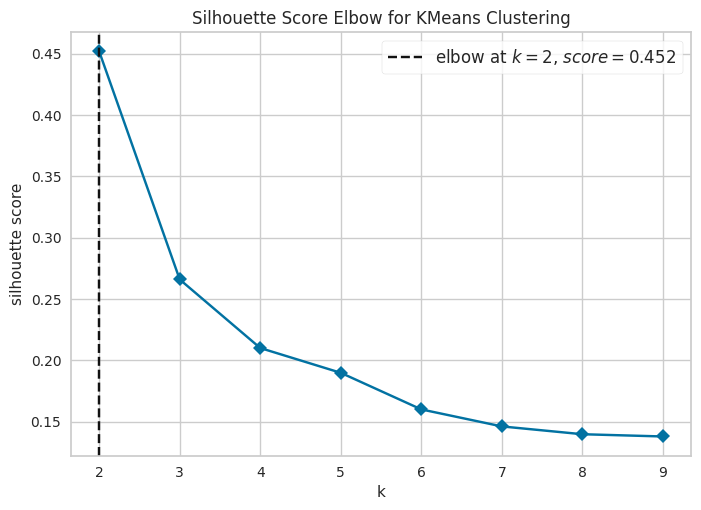

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [52]:
plt.rcParams['font.family'] ='DejaVu Sans'
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X)
visualizer.poof()

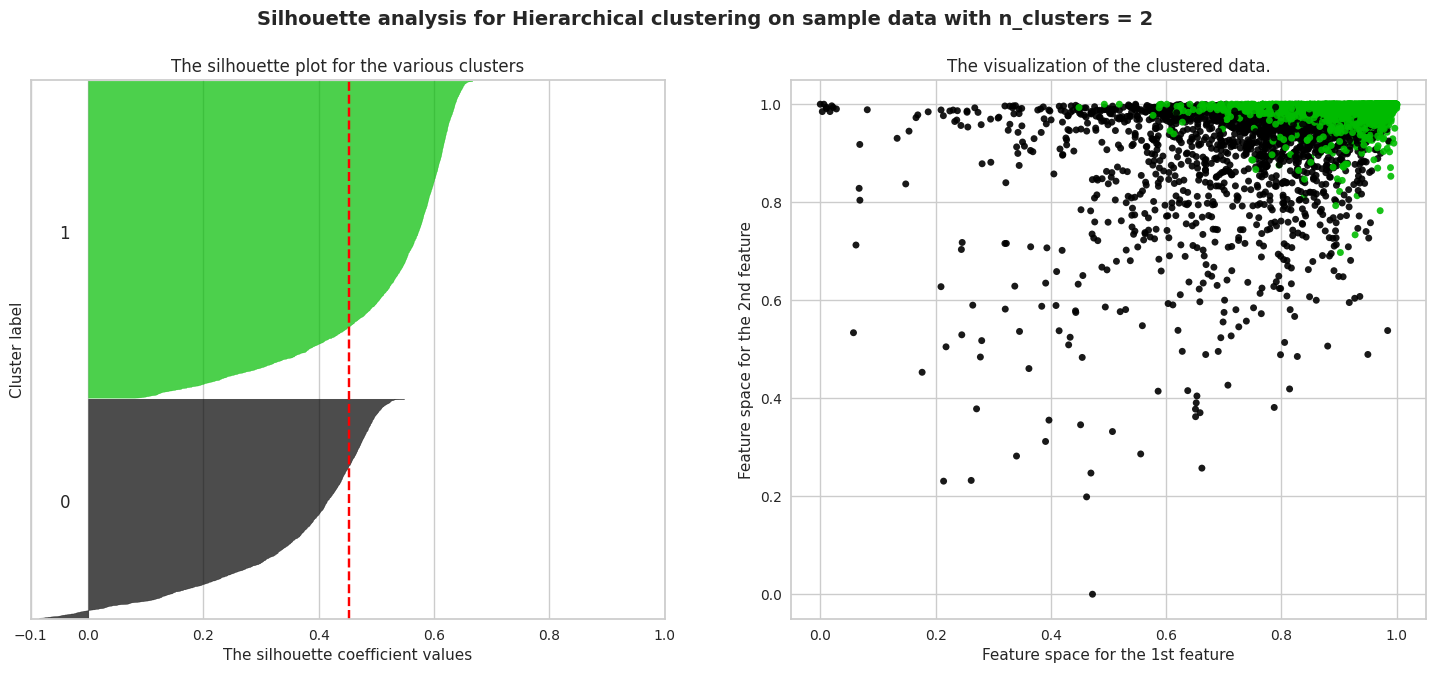

In [53]:
plot_silhouette(X, cluster_labels=df_normalized['KMeans_Cluster'])

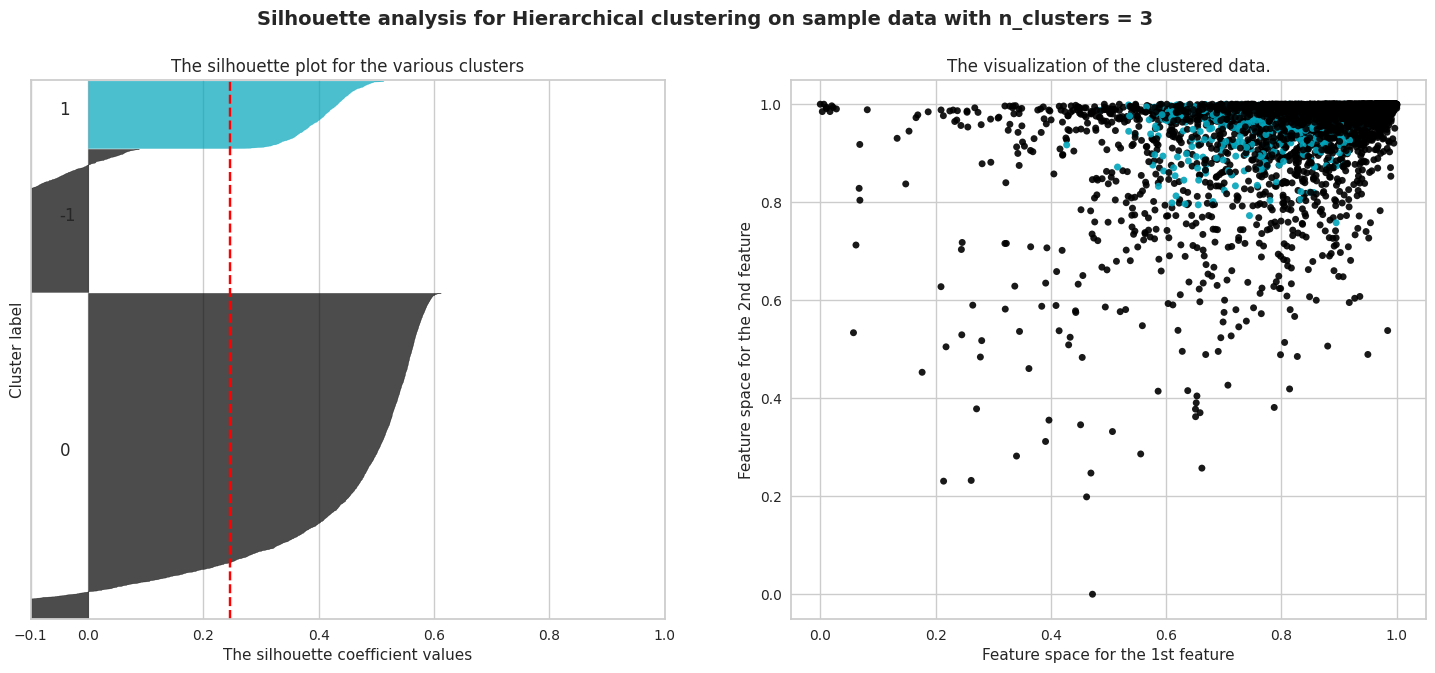

In [54]:
plot_silhouette(X, cluster_labels=df_normalized['DBSCAN_Cluster'])

In [55]:
len(features)

24

### 3.3 
Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

In [56]:
df_normalized = df_normalized.astype({'KMeans_Cluster': 'category', 'DBSCAN_Cluster': 'category'})

`Clusters KMEANS`: O Kmeans criou 2 clusters.
 - Cluster 1: esperanca ao nascer mais elevada, mais anos de estudos, idh, idh educacional, idh longevidade, idh de renda mais elevado, indice de gini mais baixo e taxa de analfabestismo mais baixo. Representando os municípios com melhores indicadores socieconomicos. Concentrando os municípios do sul, sudeste e centro-oeste
 - Já o cluster 0 é o inverso. Esperanca ao nascer menor elevada, menos anos de estudos, idh, idh educacional, idh longevidade, idh de renda menor, indice de gini mais elevado. Taxa de analfabestismo mais alta. Concentrando os municípios do norte e nordeste.

`Clusters DBScan`: O DBScan criou 2 cluster e marcou 30% das cidades como outliers. Das capitais 17 das 27 foram classificadas como outliers.
- outliers (-1): concentrou os municípios do norte e parte do nordeste. Tem a distribuição parecida com o cluster 1, mas com  distribuição mais dispersa, mas médias parecidas com o cluster 1.
- O cluster 1: concentrou os municípios do nordeste que não ficaram no cluster de outliers. Apresenta -se como o inverso o cluster O, sendo parecido com o cluster O do kmeans.
- O cluster 0: concentrou as capitais que não foram classificadas como outliers. Nesse cluster temos os municípios com menor percentual de vulneraveis a pobreza, esperanca ao nascer mais elevada, mais anos de estudos, idh, idh educacional, idh longevidade, idh de renda mais elevado, indice de gini mais baixo e taxa de analfabestismo mais baixo.Parecido com municípios com melhores indicadores socioeconomicos.Concentrando os municípios do sul, sudeste e centro-oeste. Cluster parecido com o clsuter 1 do kmeans.


A diferença entre os cluster é principalmente com relação aos estados do norte e nordeste, que o dbscan considera a maioria como outlier

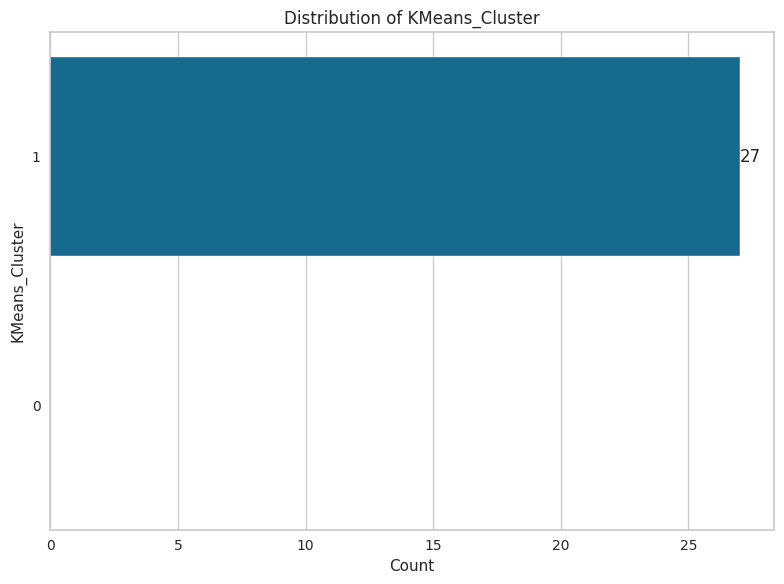

In [57]:
plot_by_column(df_normalized[df_normalized['capital']==1],'KMeans_Cluster' )

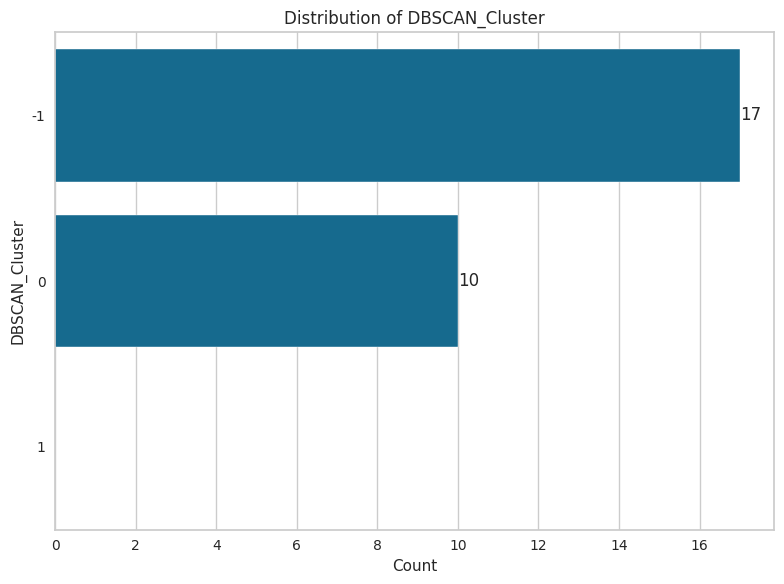

In [58]:
plot_by_column(df_normalized[df_normalized['capital']==1],'DBSCAN_Cluster' )

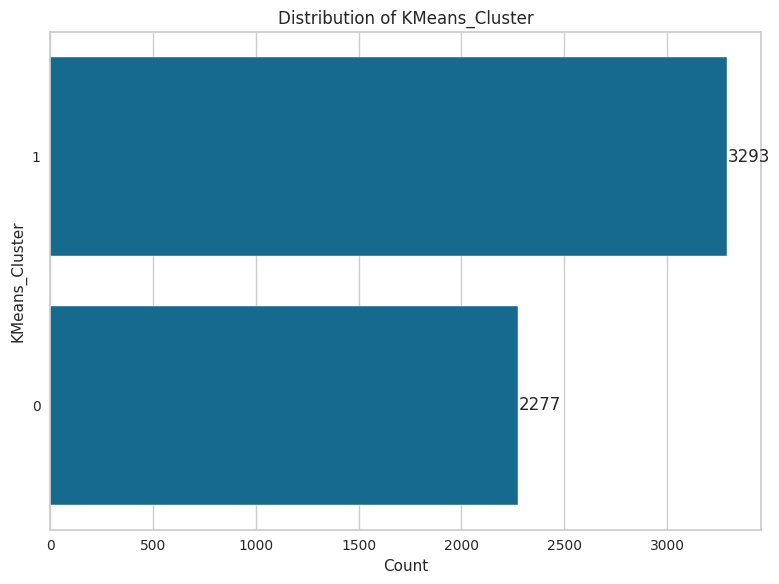

In [59]:
plot_by_column(df_normalized,'KMeans_Cluster' )

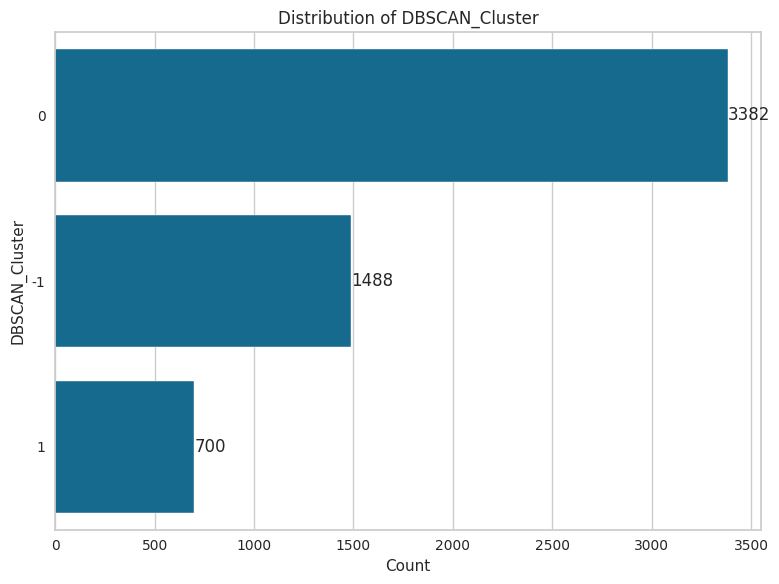

In [60]:
plot_by_column(df_normalized,'DBSCAN_Cluster' )

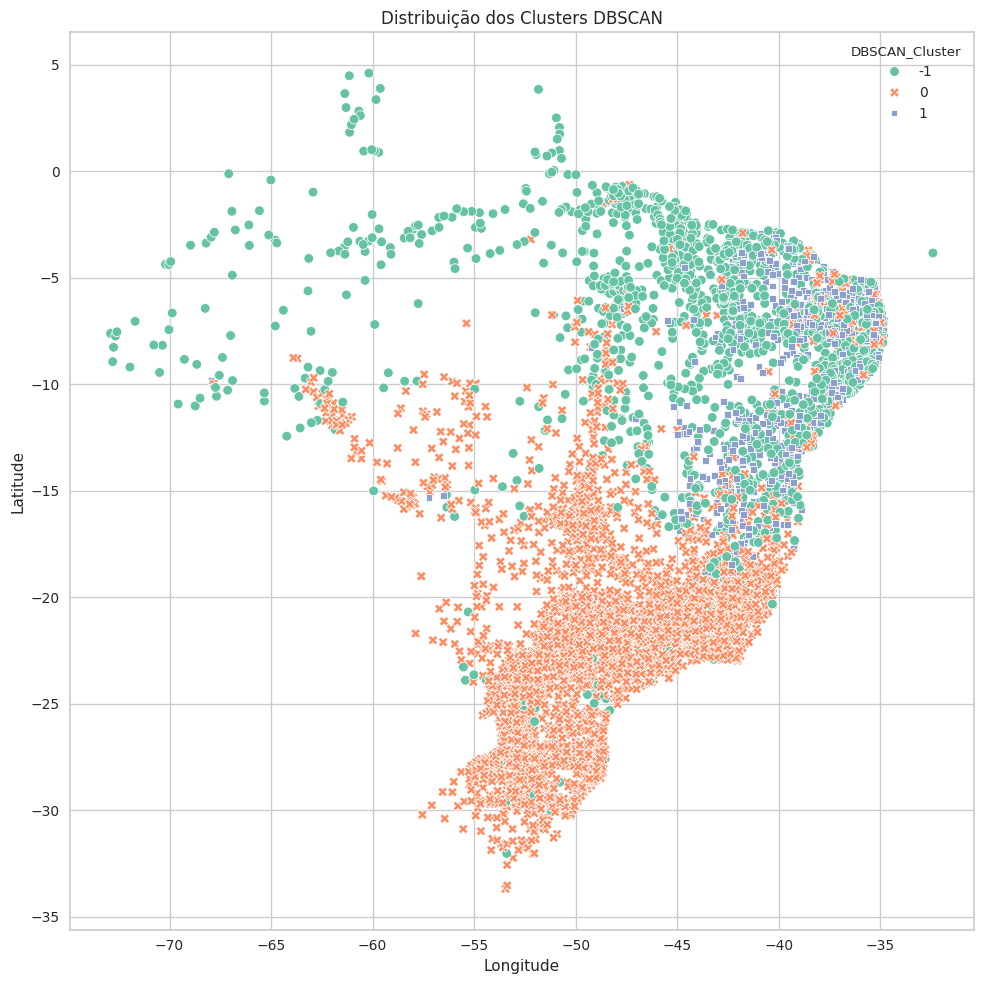

In [61]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_normalized, x='longitude', y='latitude',hue='DBSCAN_Cluster',style='DBSCAN_Cluster', palette ='Set2')
plt.title("Distribuição dos Clusters DBSCAN")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

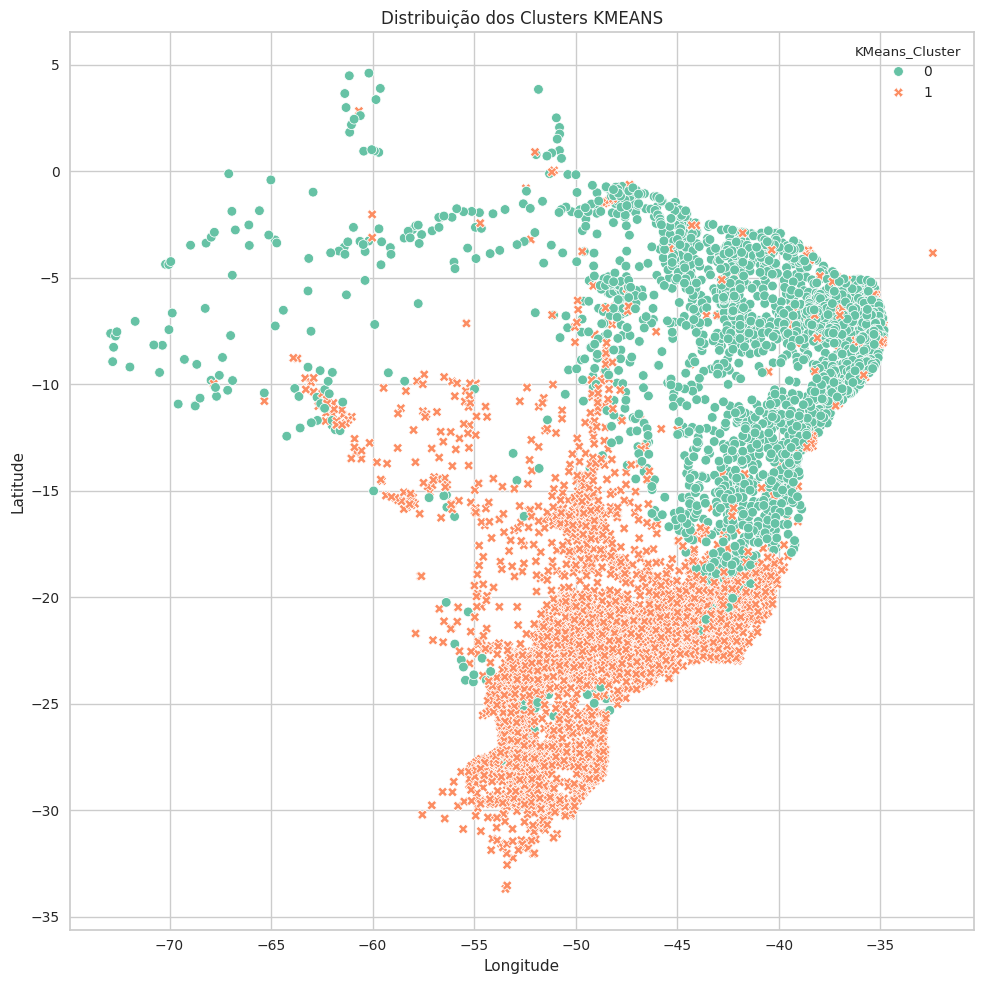

In [62]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df_normalized, x='longitude', y='latitude',hue='KMeans_Cluster',style='KMeans_Cluster', palette ='Set2')
plt.title("Distribuição dos Clusters KMEANS")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

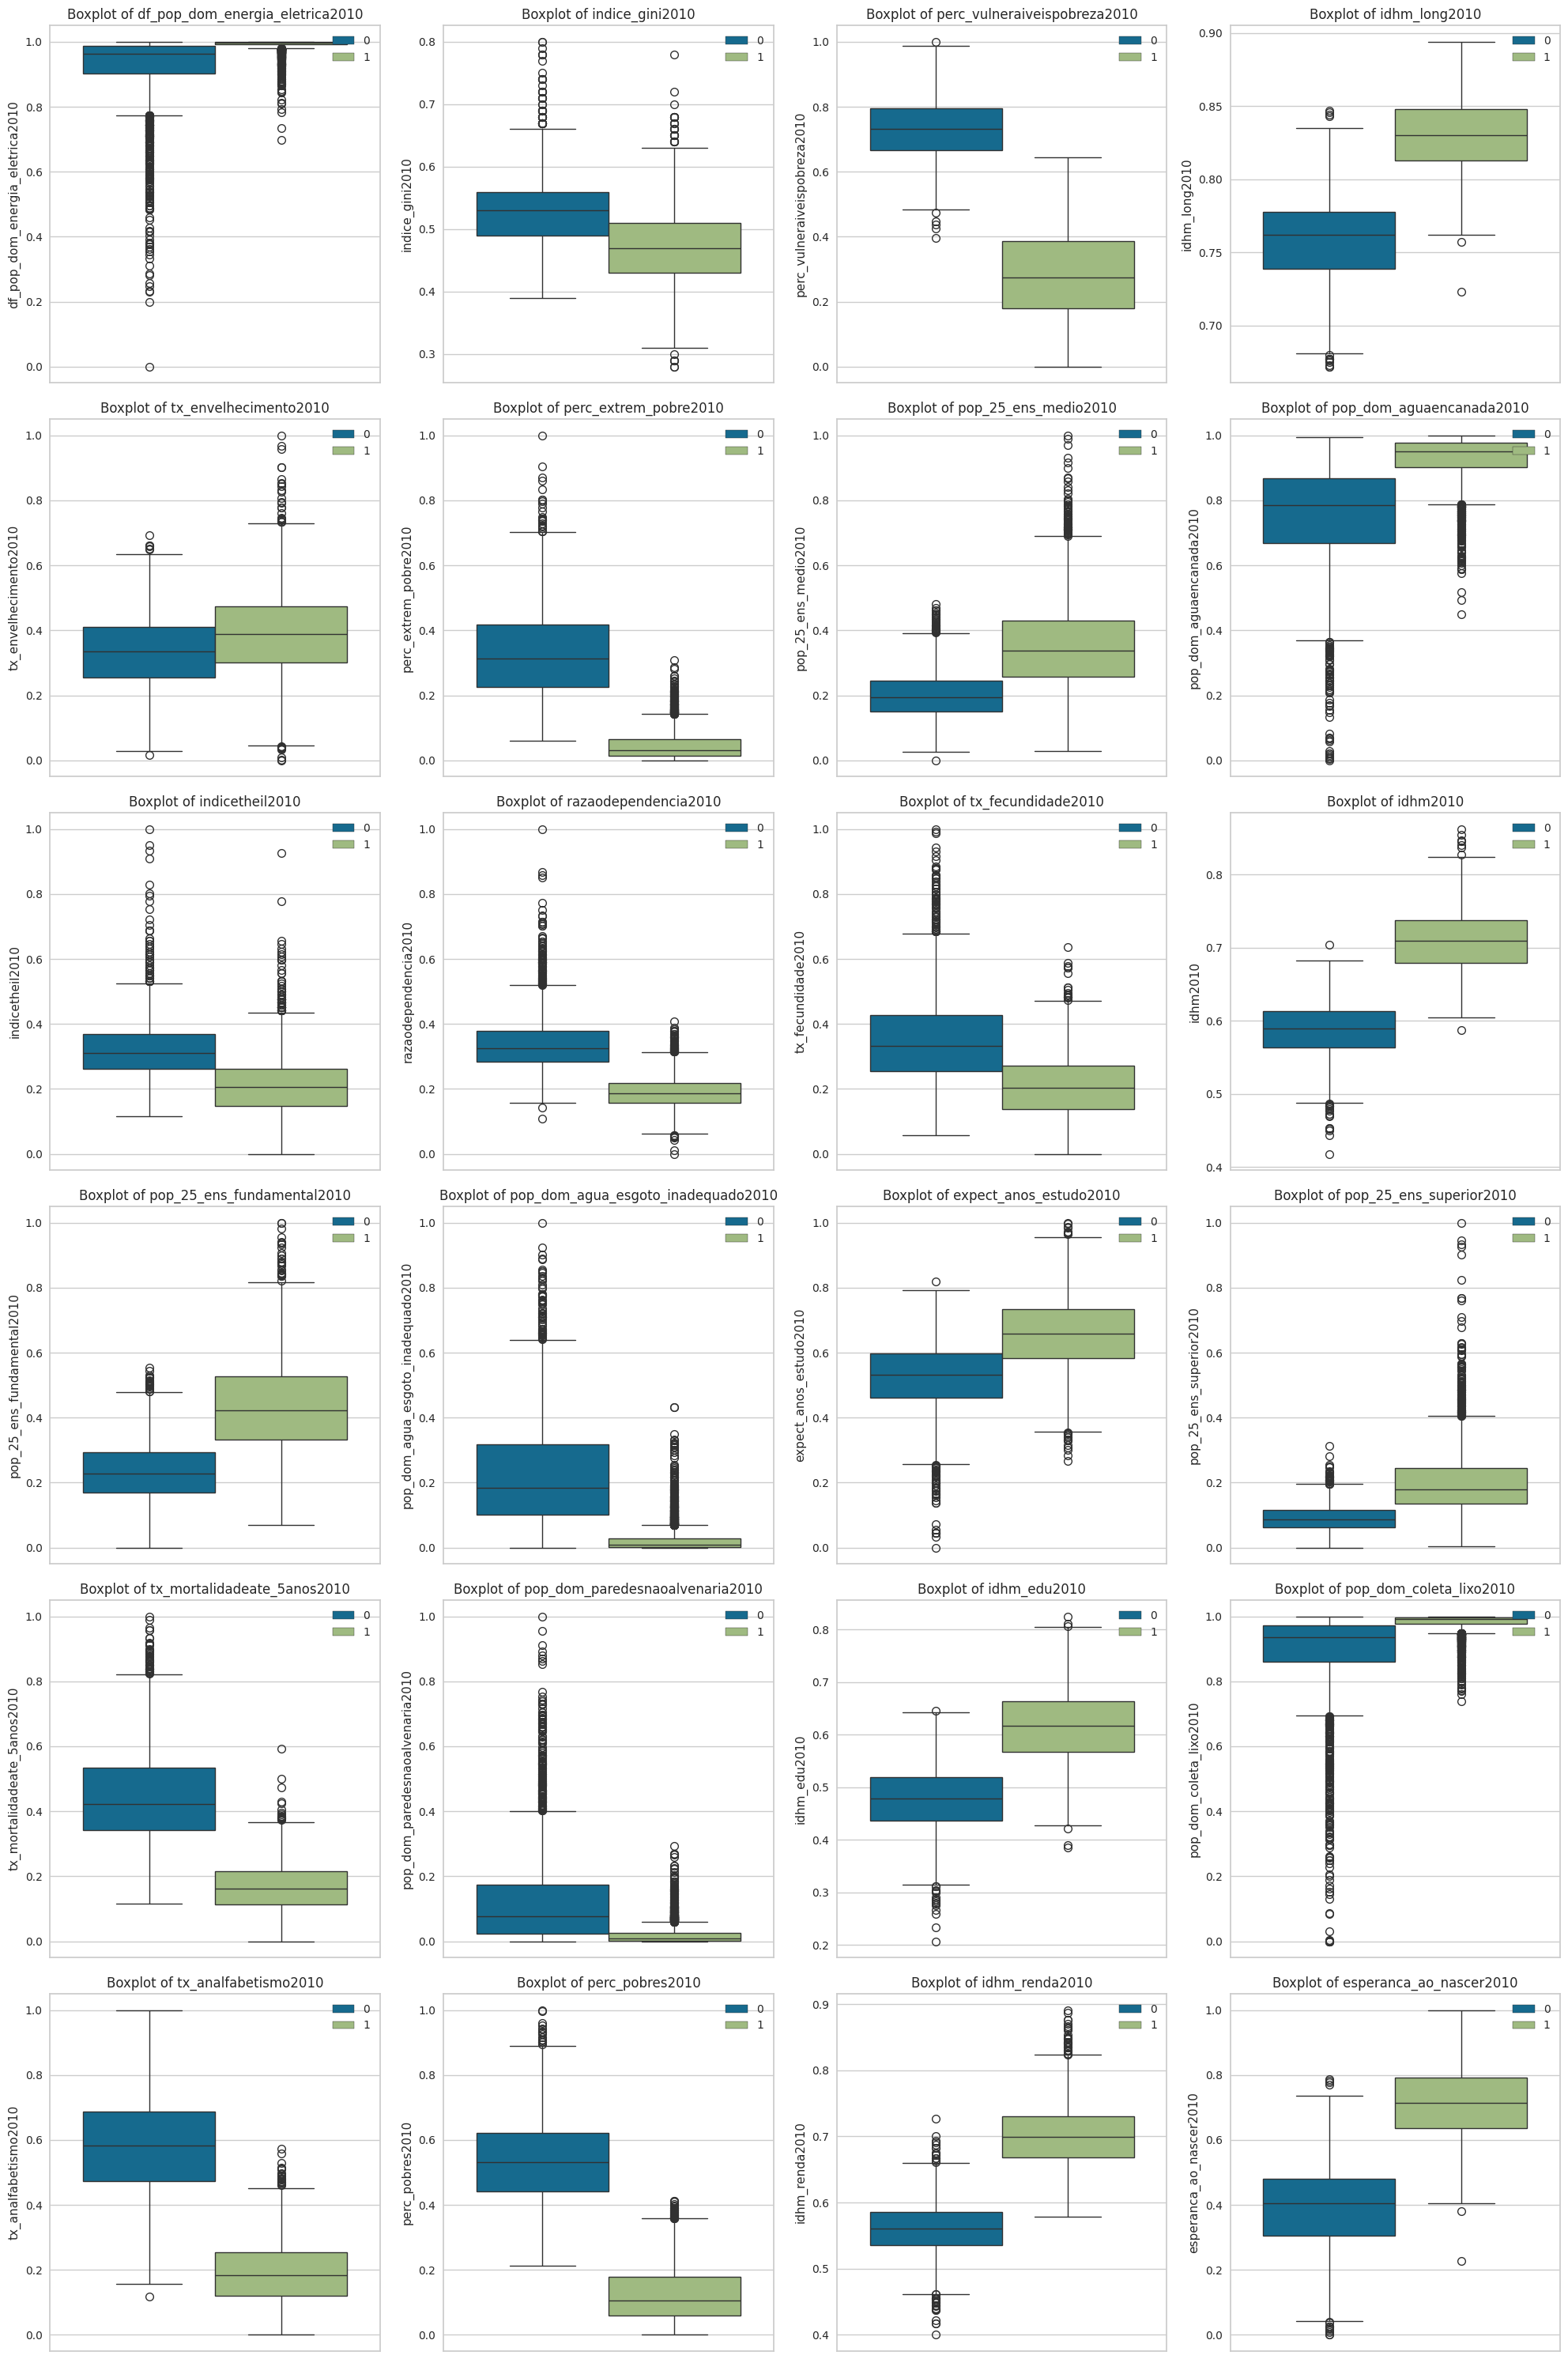

In [63]:
plot_boxplots_by_columns_hue(df=df_normalized,column_names=features, hue='KMeans_Cluster')

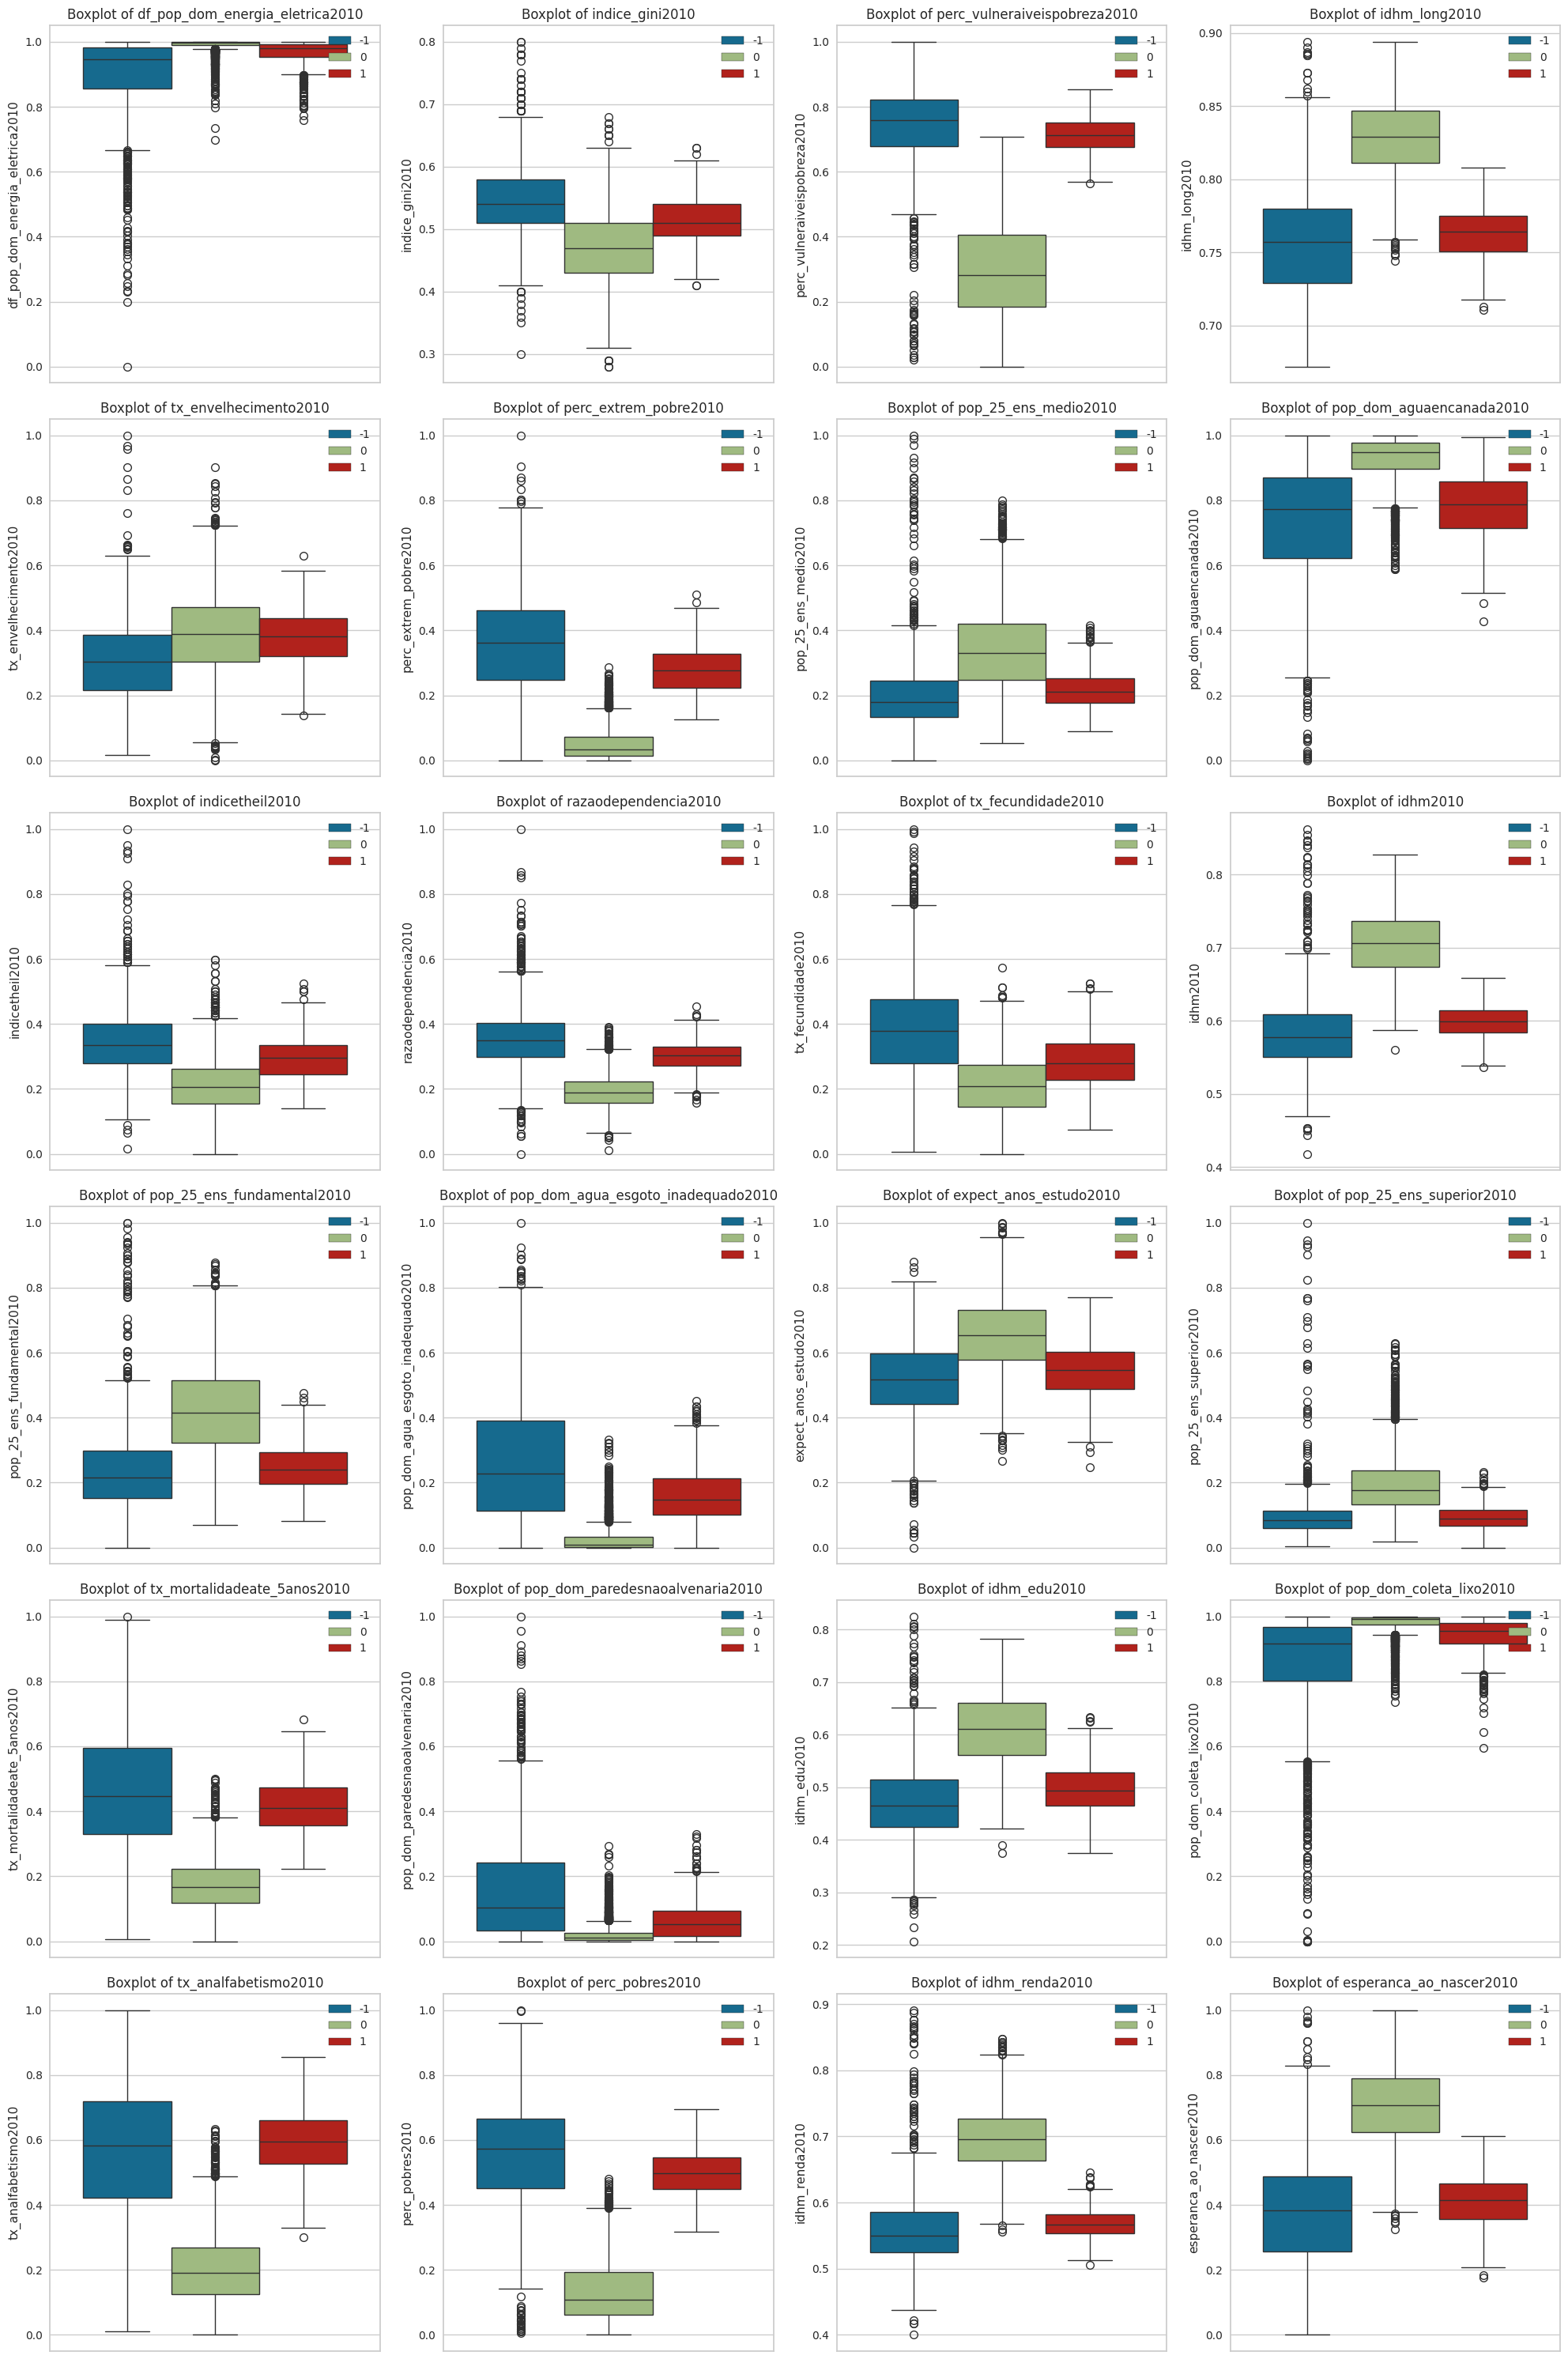

In [64]:
plot_boxplots_by_columns_hue(df=df_normalized,column_names=features, hue='DBSCAN_Cluster')

### 3.4 
Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

Pelas medidas abaixo o kmeans fez a melhor clusterização pois todos os indicadores para o kmeans são melhores do que o dbscan.

 - Índice de Silhueta mede o quão semelhante um objeto é ao seu próprio cluster em comparação com outros clusters. Avalia a coesão dentro do cluster e a separação entre clusters. Fornece valores entre -1 e 1, quanto maior melhor.

 - Índice de Davies-Bouldin se concentra em minimizar a similaridade intra-cluster e maximizar a separação inter-cluster. Quanto menor melhor, o valor ideal é zero.

 - Índice de Calinski-Harabasz enfatiza a razão entre a variância entre os clusters e a variância dentro dos clusters. Quanto maior melhor

In [65]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [66]:

silhouette_avg = silhouette_score(X, df_normalized['KMeans_Cluster'])
db_index = davies_bouldin_score(X, df_normalized['KMeans_Cluster'])
ch_index = calinski_harabasz_score(X, df_normalized['KMeans_Cluster'])

print("Silhouette Coefficient:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Coefficient: 0.4519133597548308
Davies-Bouldin Index: 0.878004017079918
Calinski-Harabasz Index: 6371.416029293783


In [67]:
silhouette_avg = silhouette_score(X, df_normalized['DBSCAN_Cluster'])
db_index = davies_bouldin_score(X, df_normalized['DBSCAN_Cluster'])
ch_index = calinski_harabasz_score(X, df_normalized['DBSCAN_Cluster'])

print("Silhouette Coefficient:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)

Silhouette Coefficient: 0.2455947935409532
Davies-Bouldin Index: 2.6388189145296845
Calinski-Harabasz Index: 2849.1554114992614


### 3.5 
Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

`RESPOSTA:` Sim, métodos como o Silhouette Score são aplicáveis em conjunto com qualquer método de clusterização com a finalidade de verificar a qualidade da clusterização.

# Medidas de similaridade

4.1 Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

`RESPOSTA`: Passos necessários
- Calcular a correlação cruzadas entre as séries temporais
- Criar a Matriz de Similaridade: A matriz será simétrica com valores na diagonal iguais a 1 (autocorrelação)
- Escolher o algoritmo de clusterização
- Aplicar o Algoritmo de Agrupamento: Use a matriz de distâncias para agrupar as séries em 3 clusters usando a matriz de corelação no algoritmo escolhido
- Avalie os resultados usando métricas como: Silhouette Score

4.2 Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

`RESPOSTA`: Poderiamos usar o algortimo de clusterização hierarquica utilizando a matriz de correlação como distância

4.3 Indique um caso de uso para essa solução projetada.

`RESPOSTA`: Calcular a correção entre séries financeiras do mercado de capitais